# Build a model to classify the person income.

# Objective: -

Income classification is used to predict or classify the person income whether it is greater then 50000 or less then equal to 50000.

An income prediction model could be leveraged to help identify individuals that may need further assistance. This can allow public policy initiatives to better target individuals in need of help. Income prediction is also integrally important for a variety of areas in the private and nonprofit sectors.

The goal of this machine learning project is to predict whether a person makes over 50K a year or not given their demographic variation. To achieve this, several classification techniques are explored and the random forest model yields to the best prediction result.

# Step 1: Import all the required libraries

- __Pandas__ : In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis and storing in a proper way. In particular, it offers data structures and operations for manipulating numerical tables and time series
- __Sklearn__ : Scikit-learn (formerly scikits.learn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn.
- __Pickle__ : Python pickle module is used for serializing and de-serializing a Python object structure. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.
- __Seaborn__ : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
- __Matplotlib__ : Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK.

In [2]:
#Loading libraries 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import sklearn.linear_model 
import sklearn
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import warnings

warnings.filterwarnings('ignore')

# Step 2 : Read dataset and basic details of dataset
Goal:- In this step we are going to read the dataset, view the dataset and analysis the basic details like total number of rows and columns, what are the column data types and see to need to create new column or not.


In this stage we are going to read our problem dataset and have a look on it.

In [4]:
#loading the dataset
try:
    df = pd.read_csv('F:\ML models\Done notebooks\Income Classification\Data\data.csv') #Path for the file
    print('Data read done successfully...')
except (FileNotFoundError, IOError):
    print("Wrong file or file path")   

Data read done successfully...


In [5]:
# To view the content inside the dataset we can use the head() method that returns a specified number of rows, string from the top. 
# The head() method returns the first 5 rows if a number is not specified.
df.head()

age          workclass   fnlwgt   education   education-num  \
0   39          State-gov    77516   Bachelors              13   
1   50   Self-emp-not-inc    83311   Bachelors              13   
2   38            Private   215646     HS-grad               9   
3   53            Private   234721        11th               7   
4   28            Private   338409   Bachelors              13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

    capital-gain   capital-loss   hours-per-week  native-country  income  
0           2174              0               40   United-States   <=50K  
1              0              0               13   United-States   <=50K  
2              0              0               40   United-States   <=50K  
3              0              0               40   United-States   <=50K  
4              0              0               40            Cuba   <=50K

# Dataset: -

The dataset used in this model is available at Kaggle.

Attribute Information:
1. age: It is continuous.

**Other features:**

1.  workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
2.  fnlwgt: It is continuous.
3.  education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-   4th, 10th, Doctorate, 5th-6th, Preschool.
4.  education-num: It is continuous.
5.  marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
6.  occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-  op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
7.  relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
8.  race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
9.  sex: Female, Male.
10. capital-gain: It is continuous.
11. capital-loss: It is continuous.
12. hours-per-week: It is continuous.
13. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

# Step3: Data Preprocessing

**Why need of Data Preprocessing?**

Preprocessing data is an important step for data analysis. The following are some benefits of preprocessing data:

 - It improves accuracy and reliability. Preprocessing data removes missing or inconsistent data values resulting from human or computer error, which can improve the accuracy and quality of a dataset, making it more reliable.
 - It makes data consistent. When collecting data, it's possible to have data duplicates, and discarding them during preprocessing can ensure the data values for analysis are consistent, which helps produce accurate results.
 - It increases the data's algorithm readability. Preprocessing enhances the data's quality and makes it easier for machine learning algorithms to read, use, and interpret it.

After we read the data, we can look at the data using:

In [6]:
# count the total number of rows and columns.
print ('The train data has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The train data has 32561 rows and 15 columns


#### By analysing the problem statement and the dataset, we get to know that the target variable is "income" column which tells whether income is greater than 50000 or it is less than equal to 50000.

In [7]:
df[' income'].value_counts()

 <=50K    24720
 >50K      7841
Name:  income, dtype: int64

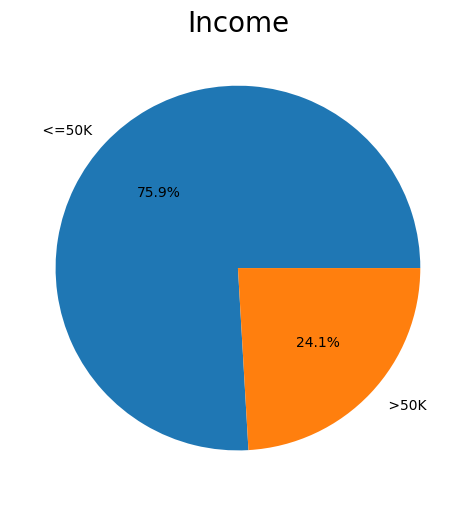

In [8]:
features = [' income']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)

    x = df[col].value_counts()
    plt.pie(x.values,
            labels=x.index,
            autopct='%1.1f%%')
    plt.title('Income',fontsize=20)

plt.show()

#### The df.value_counts() method counts the number of types of values a particular column contains. 

In [42]:
df.shape

(32561, 15)

#### The df.shape method shows the shape of the dataset. 

We can identify that out of the 32561 persons, 24720 are labeled as <=50K and 7841 as >50K.

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### The df.info() method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage. 

In [44]:
df.iloc[1]

age                                 50
 workclass            Self-emp-not-inc
 fnlwgt                          83311
 education                   Bachelors
 education-num                      13
 marital-status     Married-civ-spouse
 occupation            Exec-managerial
 relationship                  Husband
 race                            White
 sex                              Male
 capital-gain                        0
 capital-loss                        0
 hours-per-week                     13
 native-country          United-States
 income                          <=50K
Name: 1, dtype: object

####  df.iloc[ ] is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array. The iloc property gets, or sets, the value(s) of the specified indexes.

### Data Type Check for every column

**Why data type check is required?**

Data type check helps us with understanding what type of variables our dataset contains. It helps us with identifying whether to keep that variable or not. If the dataset contains contiguous data, then only float and integer type variables will be beneficial and if we have to classify any value then categorical variables will be beneficial.

In [45]:
objects_cols = ['object']
objects_lst = list(df.select_dtypes(include=objects_cols).columns)

In [46]:
print("Total number of categorical columns are ", len(objects_lst))
print("There names are as follows: ", objects_lst)

Total number of categorical columns are  9
There names are as follows:  [' workclass', ' education', ' marital-status', ' occupation', ' relationship', ' race', ' sex', ' native-country', ' income']


In [47]:
int64_cols = ['int64']
int64_lst = list(df.select_dtypes(include=int64_cols).columns)

In [48]:
print("Total number of numerical columns are ", len(int64_lst))
print("There names are as follows: ", int64_lst)

Total number of numerical columns are  6
There names are as follows:  ['age', ' fnlwgt', ' education-num', ' capital-gain', ' capital-loss', ' hours-per-week']


## Step 2 Insights: -

1) We have total 15 features where 6 of them are integer type and 9 are object type.

After this step we have to calculate various evaluation parameters which will help us in cleaning and analysing the data more accurately.

# Step 3: Descriptive Analysis

**Goal/Purpose:**  Finding the data distribution of the features. Visualization helps to understand data and also to explain the data to another person.

Things we are going to do in this step:

1. Mean
2. Median
3. Mode
4. Standard Deviation
5. Variance
6. Null Values
7. NaN Values
8. Min value
9. Max value
10. Count Value
11. Quatilers
12. Correlation
13. Skewness

In [49]:
df.describe()

age        fnlwgt   education-num   capital-gain  \
count  32561.000000  3.256100e+04    32561.000000   32561.000000   
mean      38.581647  1.897784e+05       10.080679    1077.648844   
std       13.640433  1.055500e+05        2.572720    7385.292085   
min       17.000000  1.228500e+04        1.000000       0.000000   
25%       28.000000  1.178270e+05        9.000000       0.000000   
50%       37.000000  1.783560e+05       10.000000       0.000000   
75%       48.000000  2.370510e+05       12.000000       0.000000   
max       90.000000  1.484705e+06       16.000000   99999.000000   

        capital-loss   hours-per-week  
count   32561.000000     32561.000000  
mean       87.303830        40.437456  
std       402.960219        12.347429  
min         0.000000         1.000000  
25%         0.000000        40.000000  
50%         0.000000        40.000000  
75%         0.000000        45.000000  
max      4356.000000        99.000000

#### The df.describe() method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column: count - The number of not-empty values. mean - The average (mean) value. 

# Measure the variability of data of the dataset

Variability describes how far apart data points lie from each other and from the center of a distribution.

# 1. Standard Deviation

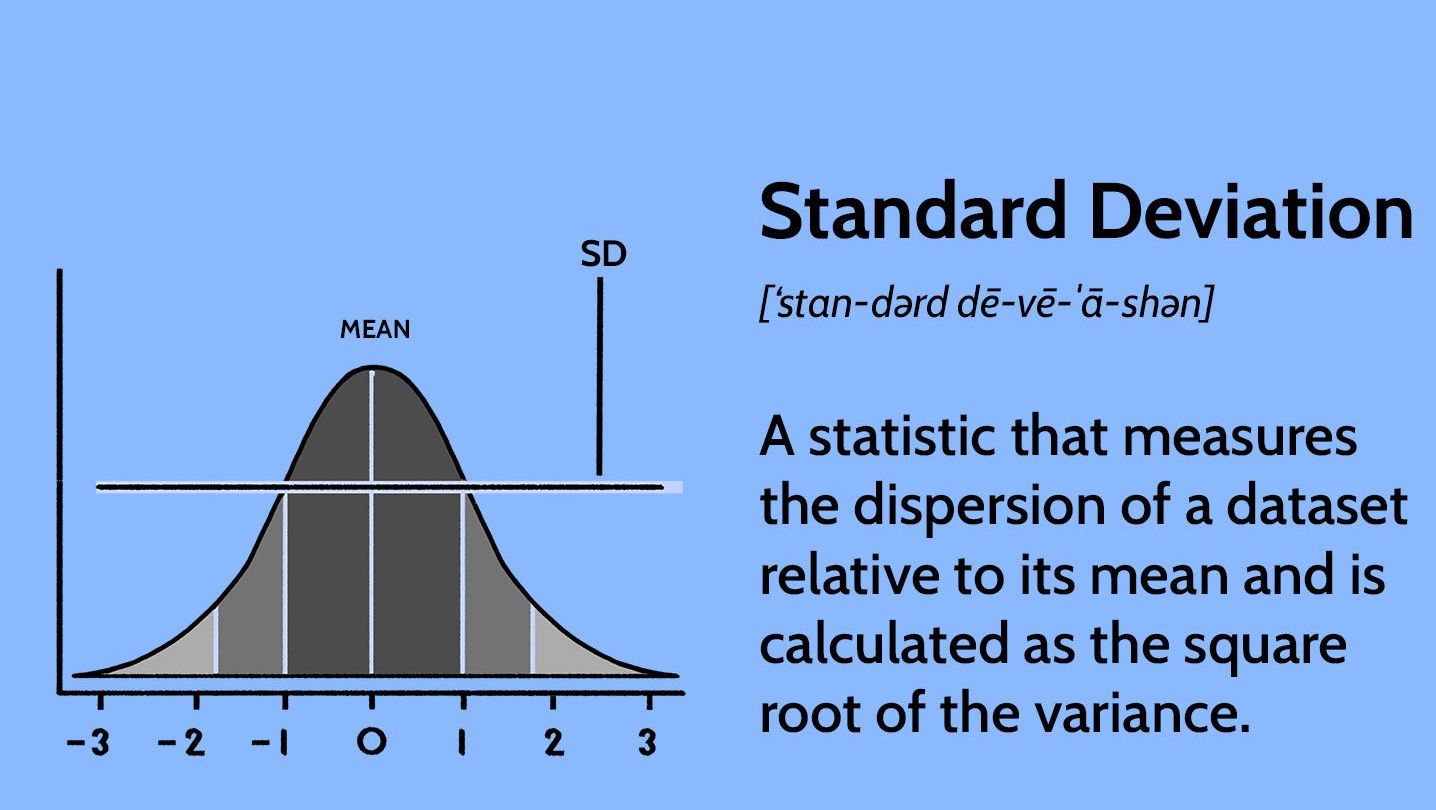

The standard deviation is the average amount of variability in your dataset.

It tells you, on average, how far each data point lies from the mean. The larger the standard deviation, the more variable the data set is and if zero variance then there is no variability in the dataset that means there no use of that dataset.


So, it helps in understanding the measurements when the data is distributed. The more the data is distributed, the greater will be the standard deviation of that data.Here, you as an individual can determine which company is beneficial in long term. But, if you didn't know the SD you would have choosen a wrong compnay for you.

In [50]:
df.std()

age                    13.640433
 fnlwgt            105549.977697
 education-num          2.572720
 capital-gain        7385.292085
 capital-loss         402.960219
 hours-per-week        12.347429
dtype: float64

#### We can also understand the standard deviation using the below function. 

In [51]:
def std_cal(df,float64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in float64_lst:
    
        rs = round(df[value].std(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    std_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return std_total_df

In [52]:
int64_cols = ['int64']
int64_lst = list(df.select_dtypes(include=int64_cols).columns)
std_cal(df,int64_lst)

normal_value  zero_value
0             6           0

zero_value -> is the zero variance and when then there is no variability in the dataset that means there no use of that dataset.



# 2. Variance

The variance is the average of squared deviations from the mean. A deviation from the mean is how far a score lies from the mean.

Variance is the square of the standard deviation. This means that the units of variance are much larger than those of a typical value of a data set.

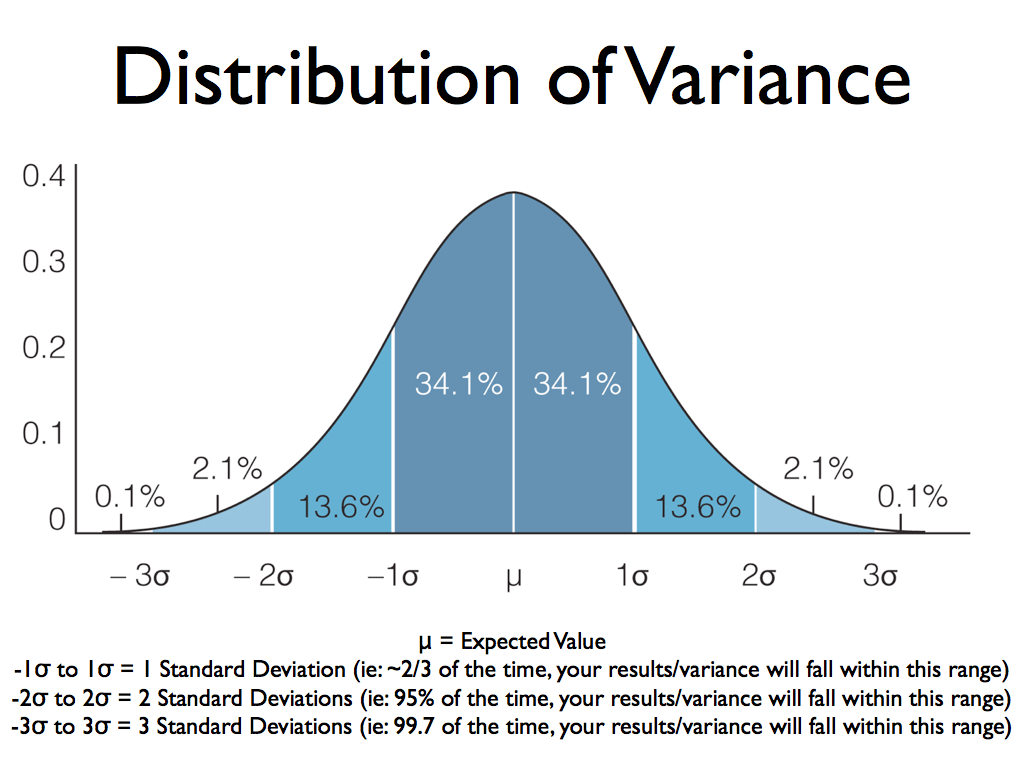

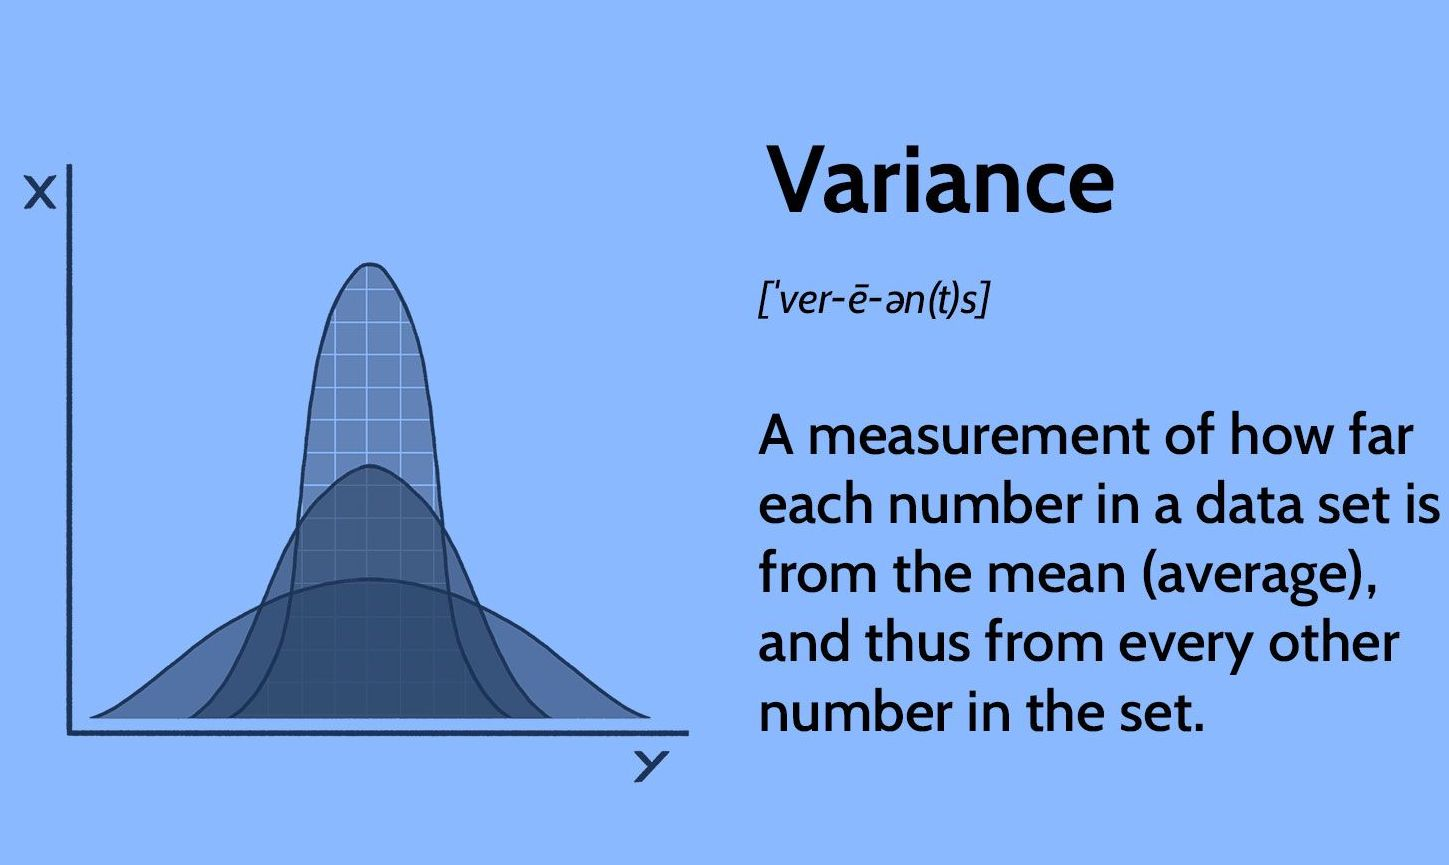

#### Why do we used Variance ?

By Squairng the number we get non-negative computation i.e. Disperson cannot be negative.
The presence of variance is very important in your dataset because this will allow the model to learn about the different patterns hidden in the data

In [53]:
df.var()

age                1.860614e+02
 fnlwgt            1.114080e+10
 education-num     6.618890e+00
 capital-gain      5.454254e+07
 capital-loss      1.623769e+05
 hours-per-week    1.524590e+02
dtype: float64

#### We can also understand the Variance using the below function.

In [54]:
zero_cols = []

def var_cal(df,float64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in float64_lst:
    
        rs = round(df[value].var(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
            zero_cols.append(value)
    
    var_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return var_total_df

In [55]:
var_cal(df, int64_lst)

normal_value  zero_value
0             6           0

zero_value -> Zero variance means that there is no difference in the data values, which means that they are all the same.

# Measure central tendency

A measure of central tendency is a single value that attempts to describe a set of data by identifying the central position within that set of data. As such, measures of central tendency are sometimes called measures of central location. They are also classed as summary statistics.



Mean - The average value. Median - The mid point value. Mode - The most common value.

# 1. Mean

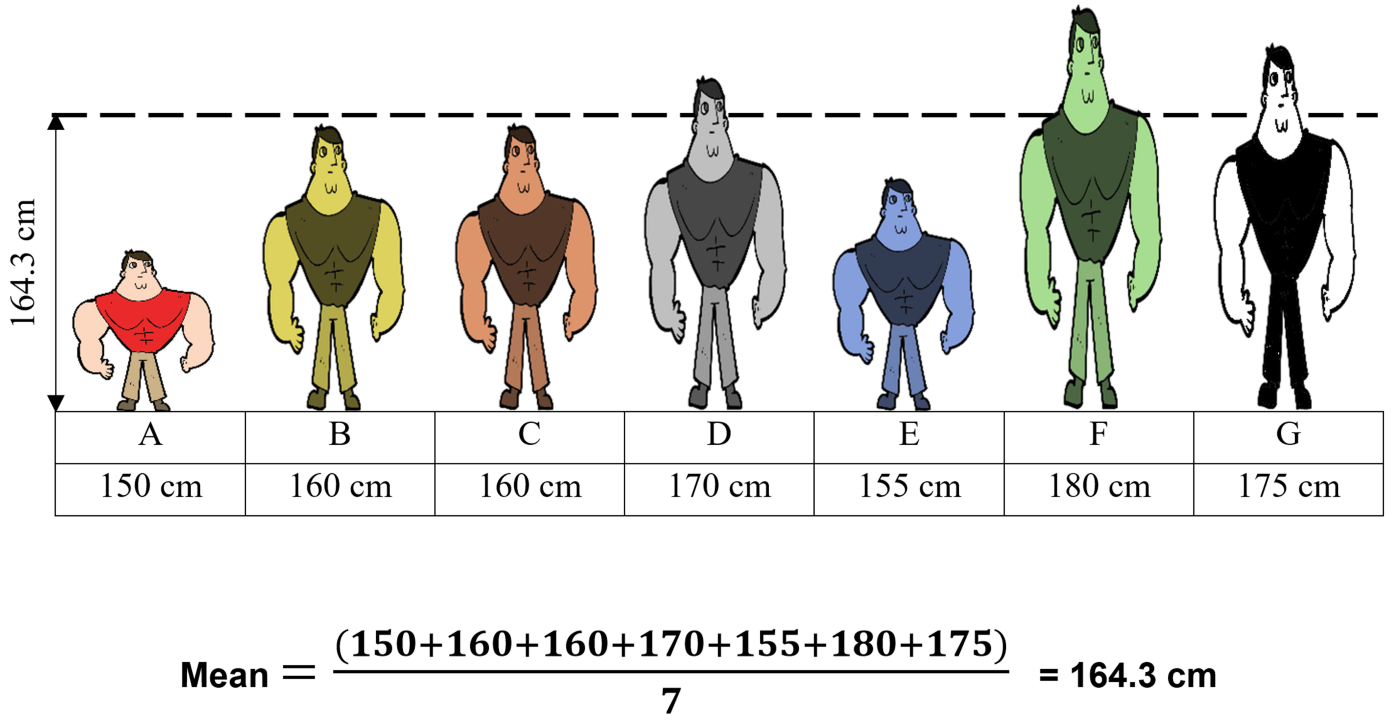

The mean is the arithmetic average, and it is probably the measure of central tendency that you are most familiar.

#### Why do we calculate mean?




The mean is used to summarize a data set. It is a measure of the center of a data set.


In [56]:
df.mean()

age                    38.581647
 fnlwgt            189778.366512
 education-num         10.080679
 capital-gain        1077.648844
 capital-loss          87.303830
 hours-per-week        40.437456
dtype: float64

#### We can also understand the mean using the below function. 

In [57]:
def mean_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in int64_lst:
    
        rs = round(df[value].mean(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    mean_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return mean_total_df

In [58]:
mean_cal(df, int64_lst)

normal_value  zero_value
0             6           0

zero_value -> that the mean of a paticular column is zero, which isn't usefull in anyway and need to be drop.

# 2.Median
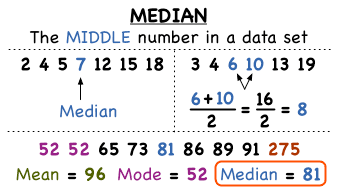

The median is the middle value. It is the value that splits the dataset in half.The median of a dataset is the value that, assuming the dataset is ordered from smallest to largest, falls in the middle. If there are an even number of values in a dataset, the middle two values are the median.

#### Why do we calculate median ?

By comparing the median to the mean, you can get an idea of the distribution of a dataset. When the mean and the median are the same, the dataset is more or less evenly distributed from the lowest to highest values.

In [59]:
df.median()

age                    37.0
 fnlwgt            178356.0
 education-num         10.0
 capital-gain           0.0
 capital-loss           0.0
 hours-per-week        40.0
dtype: float64

####  We can also understand the median using the below function. 

In [60]:
def median_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in int64_lst:
    
        rs = round(df[value].mean(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    median_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return median_total_df

In [61]:
median_cal(df, int64_lst)

normal_value  zero_value
0             6           0

zero_value -> that the median of a paticular column is zero which isn't usefull in anyway and need to be drop.

# 3. Mode
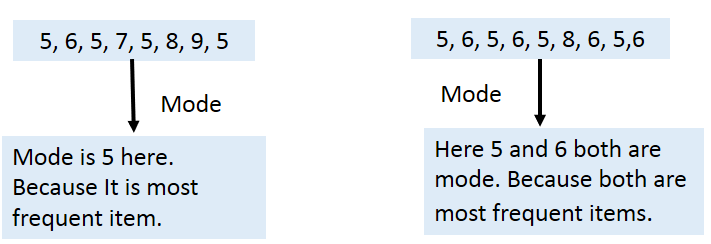
The mode is the value that occurs the most frequently in your data set. On a bar chart, the mode is the highest bar. If the data have multiple values that are tied for occurring the most frequently, you have a multimodal distribution. If no value repeats, the data do not have a mode.

#### Why do we calculate mode ?

The mode can be used to summarize categorical variables, while the mean and median can be calculated only for numeric variables. This is the main advantage of the mode as a measure of central tendency. It's also useful for discrete variables and for continuous variables when they are expressed as intervals.

In [62]:
df.mode()

age  workclass   fnlwgt  education   education-num       marital-status  \
0  36.0    Private   123011    HS-grad             9.0   Married-civ-spouse   
1   NaN        NaN   164190        NaN             NaN                  NaN   
2   NaN        NaN   203488        NaN             NaN                  NaN   

        occupation  relationship    race    sex   capital-gain   capital-loss  \
0   Prof-specialty       Husband   White   Male            0.0            0.0   
1              NaN           NaN     NaN    NaN            NaN            NaN   
2              NaN           NaN     NaN    NaN            NaN            NaN   

    hours-per-week  native-country  income  
0             40.0   United-States   <=50K  
1              NaN             NaN     NaN  
2              NaN             NaN     NaN

In [63]:
def mode_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value', 'string_value']
    zero_value = 0
    normal_value = 0
    string_value = 0
    
    for value in int64_lst:
                
        rs = df[value].mode()[0]
        
        if isinstance(rs, str):
            string_value = string_value + 1
        else:

            if rs > 0:
                normal_value = normal_value + 1

            elif rs == 0:
                zero_value = zero_value + 1
    
    mode_total_df =  pd.DataFrame([[normal_value, zero_value, string_value]], columns=cols) 
    
    return mode_total_df

In [64]:
mode_cal(df, list(df.columns))

normal_value  zero_value  string_value
0             4           2             9

zero_value -> that the mode of a paticular column is zero which isn't usefull in anyway and need to be drop.

### Graphical Representation of statistical analysis

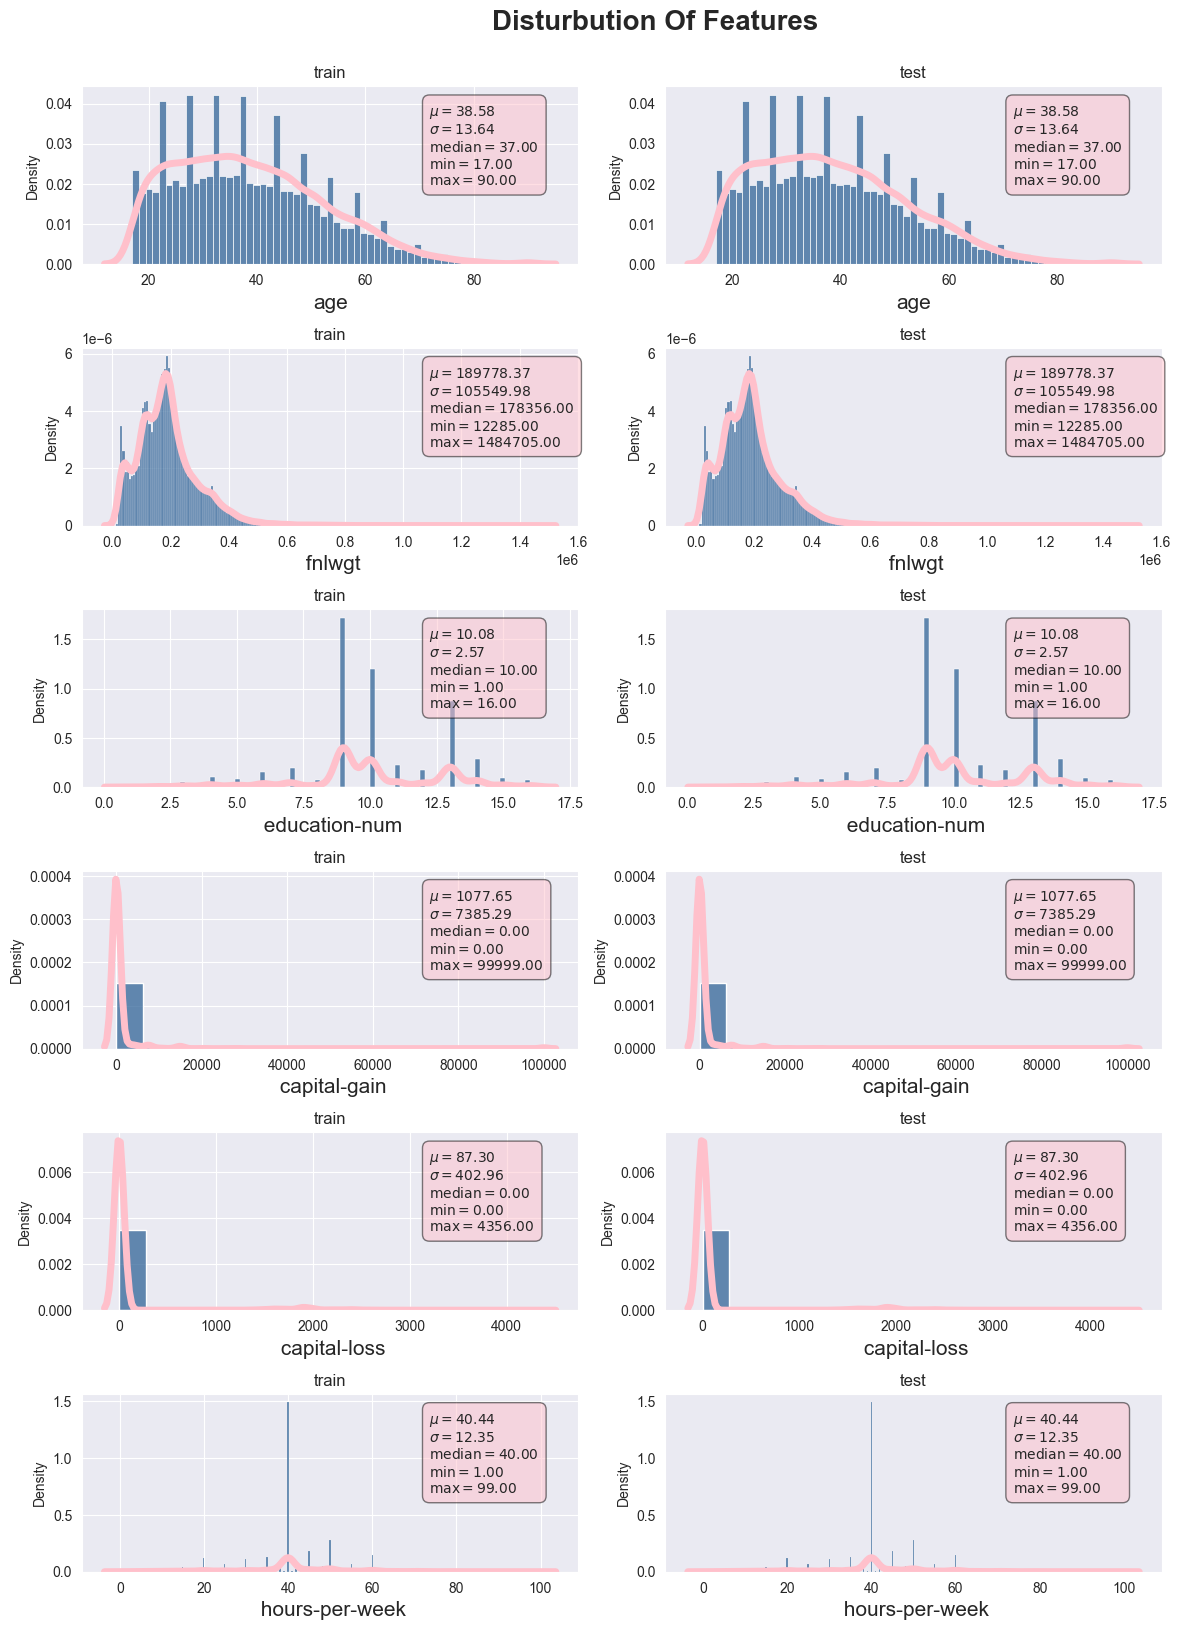

In [65]:
sns.set_style('darkgrid')
color = 'royalblue'

plt.figure(figsize = (12,55))
i = 0
for index, col in enumerate(list(df.select_dtypes(include=['int64','int32','float64']).columns)):
    i += 1 ;
    plt.subplot(21,2, index + i)
    ax = sns.histplot(x = col, data = df, color = "#326598", stat = "density", common_norm=False)
    sns.kdeplot(x = col, data = df, color = "pink", linewidth = 5)
    plt.xlabel(col, size = 15)
    plt.title('train')
    # set text on axes
    textstr_train = '\n'.join((
    r'$\mu=%.2f$' %df[col].mean(),
    r'$\sigma=%.2f$' %df[col].std(),
    r'$\mathrm{median}=%0.2f$' %np.median(df[col]),
    r'$\mathrm{min}=%.2f$' %df[col].min(),
    r'$\mathrm{max}=%.2f$' %df[col].max()
    ))
    ax.text(0.7, 0.90, textstr_train, transform=ax.transAxes, fontsize=10, verticalalignment='top',
                     bbox=dict(boxstyle='round',facecolor='pink', edgecolor='black', pad=0.5, alpha = 0.5))
    
    plt.subplot(21,2, index + (i+1))
    ax = sns.histplot(x = col, data = df, color = "#326598", stat = "density", common_norm=False)
    sns.kdeplot(x = col, data = df, color = "pink", linewidth = 5)
    plt.xlabel(col, size = 15)
    plt.title('test')
    
    textstr_test = '\n'.join((
    r'$\mu=%.2f$' %df[col].mean(),
    r'$\sigma=%.2f$' %df[col].std(),
    r'$\mathrm{median}=%0.2f$' %np.median(df[col]),
    r'$\mathrm{min}=%.2f$' %df[col].min(),
    r'$\mathrm{max}=%.2f$' %df[col].max()
    ))
    ax.text(0.7, 0.90, textstr_test, transform=ax.transAxes, fontsize=10, verticalalignment='top',bbox=dict(boxstyle='round',facecolor='pink', edgecolor='black', pad=0.5, alpha = 0.5))
    plt.grid()

plt.suptitle("Disturbution Of Features", y = 1, x = 0.55, size = 20,fontweight = "bold")
plt.tight_layout()
plt.show()

# Null and Nan values

1. **Null Values**


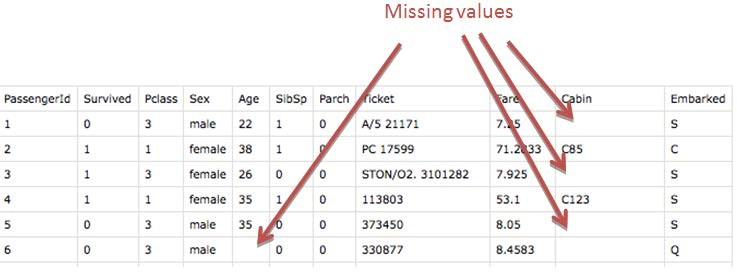

A null value in a relational database is used when the value in a column is unknown or missing. A null is neither an empty string (for character or datetime data types) nor a zero value (for numeric data types).

In [66]:
df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

As we notice that there is no null values in our dataset.

2. **Nan Values**

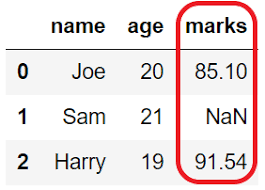

NaN, standing for Not a Number, is a member of a numeric data type that can be interpreted as a value that is undefined or unrepresentable, especially in floating-point arithmetic.

In [67]:
df.isna().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

As we notice that there is no nan values in our dataset.

#### Another way to remove null and nan values is to use the method "df.dropna(inplace=True)". 

# Count of unique occurences of every value in all categorical value



In [68]:
for value in objects_lst:
    
    print(f"{value:{10}} {df[value].value_counts()}")

 workclass  Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name:  workclass, dtype: int64
 education  HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name:  education, dtype: int64
 marital-status  Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name:  marital-status, dtype: int64
 occupation  Prof-specialty  

- Categorical data are variables that contain label values rather than numeric values.The number of possible values is often limited to a fixed set.
- Use Label Encoder to label the categorical data. Label Encoder is the part of SciKit Learn library in Python and used to convert categorical data, or text data, into numbers, which our predictive models can better understand.



__Label Encoding__ refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

In [69]:
#Before Encoding
for value in objects_lst:
    print(value)
    print()
    print(df[value])
    print("------------------------------------------------")
    print()

 workclass

0                State-gov
1         Self-emp-not-inc
2                  Private
3                  Private
4                  Private
               ...        
32556              Private
32557              Private
32558              Private
32559              Private
32560         Self-emp-inc
Name:  workclass, Length: 32561, dtype: object
------------------------------------------------

 education

0          Bachelors
1          Bachelors
2            HS-grad
3               11th
4          Bachelors
            ...     
32556     Assoc-acdm
32557        HS-grad
32558        HS-grad
32559        HS-grad
32560        HS-grad
Name:  education, Length: 32561, dtype: object
------------------------------------------------

 marital-status

0              Never-married
1         Married-civ-spouse
2                   Divorced
3         Married-civ-spouse
4         Married-civ-spouse
                ...         
32556     Married-civ-spouse
32557     Married-civ-spouse
32558

In [70]:
#Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for value in objects_lst:
    df[value] = le.fit_transform(df[value])

In [71]:
#After encoding or converting categorical col values into numbers
for value in objects_lst:
    print(value)
    print()
    print(df[value])
    print("------------------------------------------------")
    print()

 workclass

0        7
1        6
2        4
3        4
4        4
        ..
32556    4
32557    4
32558    4
32559    4
32560    5
Name:  workclass, Length: 32561, dtype: int32
------------------------------------------------

 education

0         9
1         9
2        11
3         1
4         9
         ..
32556     7
32557    11
32558    11
32559    11
32560    11
Name:  education, Length: 32561, dtype: int32
------------------------------------------------

 marital-status

0        4
1        2
2        0
3        2
4        2
        ..
32556    2
32557    2
32558    6
32559    4
32560    2
Name:  marital-status, Length: 32561, dtype: int32
------------------------------------------------

 occupation

0         1
1         4
2         6
3         6
4        10
         ..
32556    13
32557     7
32558     1
32559     1
32560     4
Name:  occupation, Length: 32561, dtype: int32
------------------------------------------------

 relationship

0        1
1        0
2        1
3 

1 ~ >50K,
0 ~ <=50K

# Skewness 

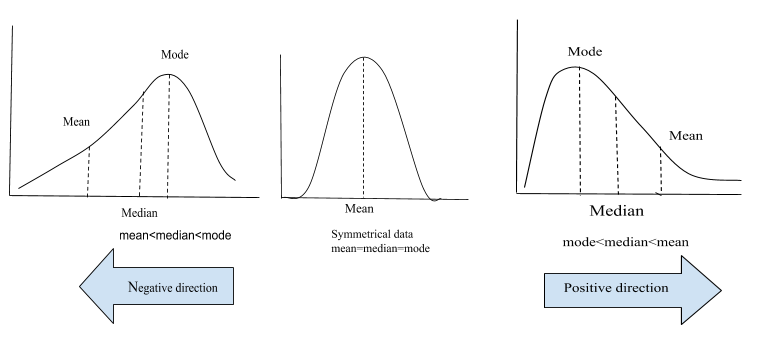

Skewness is a measure of the asymmetry of a distribution. A distribution is asymmetrical when its left and right side are not mirror images. A distribution can have right (or positive), left (or negative), or zero skewness

#### Why do we calculate Skewness ?

Skewness gives the direction of the outliers if it is right-skewed, most of the outliers are present on the right side of the distribution while if it is left-skewed, most of the outliers will present on the left side of the distribution

#### Below is the function to calculate skewness. 

In [72]:
def right_nor_left(df, int64_lst):
    
    temp_skewness = ['column', 'skewness_value', 'skewness (+ve or -ve)']
    temp_skewness_values  = []
    
    temp_total = ["positive (+ve) skewed", "normal distrbution" , "negative (-ve) skewed"]
    positive = 0
    negative = 0
    normal = 0
    
    for value in int64_lst:
    
        rs = round(df[value].skew(),4)

        if rs > 0:
            temp_skewness_values.append([value,rs , "positive (+ve) skewed"])   
            positive = positive + 1

        elif rs == 0:
            temp_skewness_values.append([value,rs,"normal distrbution"])
            normal = normal + 1

        elif rs < 0:
            temp_skewness_values.append([value,rs, "negative (-ve) skewed"])
            negative = negative + 1
    
    skewness_df =  pd.DataFrame(temp_skewness_values, columns=temp_skewness) 
    skewness_total_df =  pd.DataFrame([[positive, normal, negative]], columns=temp_total) 
    
    return skewness_df, skewness_total_df

In [73]:
int64_cols = ['int64','int32']
int64_lst_col = list(df.select_dtypes(include=int64_cols).columns)

skew_df,skew_total_df = right_nor_left(df, int64_lst_col)

In [74]:
skew_df

column  skewness_value  skewness (+ve or -ve)
0               age          0.5587  positive (+ve) skewed
1         workclass         -0.7520  negative (-ve) skewed
2            fnlwgt          1.4470  positive (+ve) skewed
3         education         -0.9340  negative (-ve) skewed
4     education-num         -0.3117  negative (-ve) skewed
5    marital-status         -0.0135  negative (-ve) skewed
6        occupation          0.1146  positive (+ve) skewed
7      relationship          0.7868  positive (+ve) skewed
8              race         -2.4354  negative (-ve) skewed
9               sex         -0.7193  negative (-ve) skewed
10     capital-gain         11.9538  positive (+ve) skewed
11     capital-loss          4.5946  positive (+ve) skewed
12   hours-per-week          0.2276  positive (+ve) skewed
13   native-country         -3.6583  negative (-ve) skewed
14           income          1.2124  positive (+ve) skewed

In [75]:
skew_total_df

positive (+ve) skewed  normal distrbution  negative (-ve) skewed
0                      8                   0                      7

We notice with the above results that we have following details:
1. 8 columns are positive skewed
2. 7 columns are negative skewed

### Step 3 Insights: - 

With the statistical analysis we have found that the data have a lot of skewness in them all the columns are positively skewed with mostly zero variance.

Statistical analysis is little difficult to understand at one glance so to make it more understandable we will perform visulatization on the data which will help us to understand the process easily.

### Why we are calculating all these metrics? 

Mean / Median /Mode/ Variance /Standard Deviation are all very basic but very important concept of statistics used in data science. Almost all the machine learning algorithm uses these concepts in data preprocessing steps. These concepts are part of descriptive statistics where we basically used to describe and understand the data for features in Machine learning

### Types of income streams: -

- Earned income
- Profit 
- Interest income
- Dividend income
- Rental income
- Capital gains
- Royalty income
- Residual income

# Step 4: Data Exploration
**Goal/Purpose:**

Graphs we are going to develop in this step

1. Histogram of all columns to check the distrubution of the columns
2. Distplot or distribution plot of all columns to check the variation in the data distribution
3. Heatmap to calculate correlation within feature variables
4. Boxplot to find out outlier in the feature columns
5. Pair Plot

# 1. Histogram

A histogram is a bar graph-like representation of data that buckets a range of classes into columns along the horizontal x-axis.The vertical y-axis represents the number count or percentage of occurrences in the data for each column

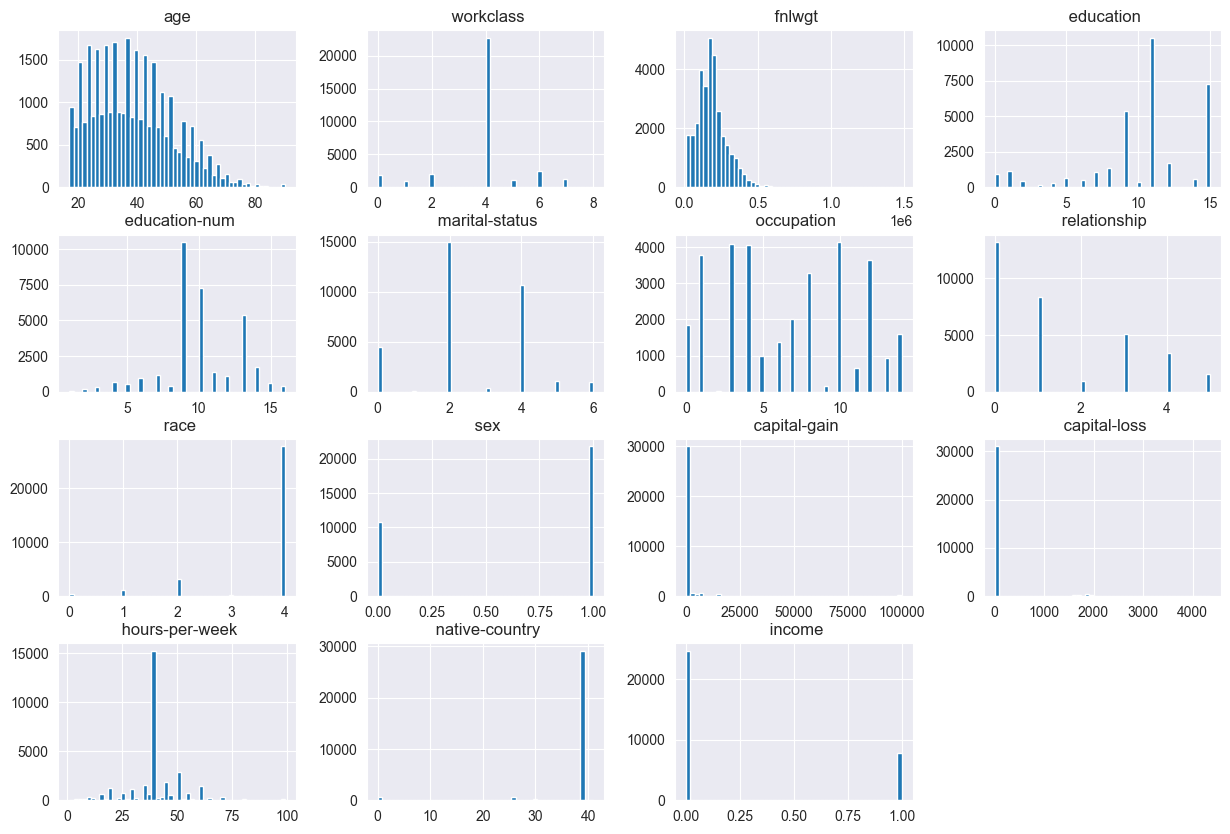

In [76]:
# Distribution in attributes
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(15,10))
plt.show()


### Histogram Insight: -

Histogram helps in identifying the following:
- View the shape of your data set’s distribution to look for outliers or other significant data points.

- Determine whether something significant has boccurred from one time period to another.

### From the above histogram we observe that education-num and relationship are highly effect the income.

### Why Histogram? 

It is used to illustrate the major features of the distribution of the data in a convenient form. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

From the above graphical representation we can identify that the highest bar represents the outliers which is above the maximum range.

We can also identify that the values are moving on the right side, which determines positive and the centered values determines normal skewness.

# 2. Distplot

A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables. The Seaborn module along with the Matplotlib module is used to depict the distplot with different variations in it 

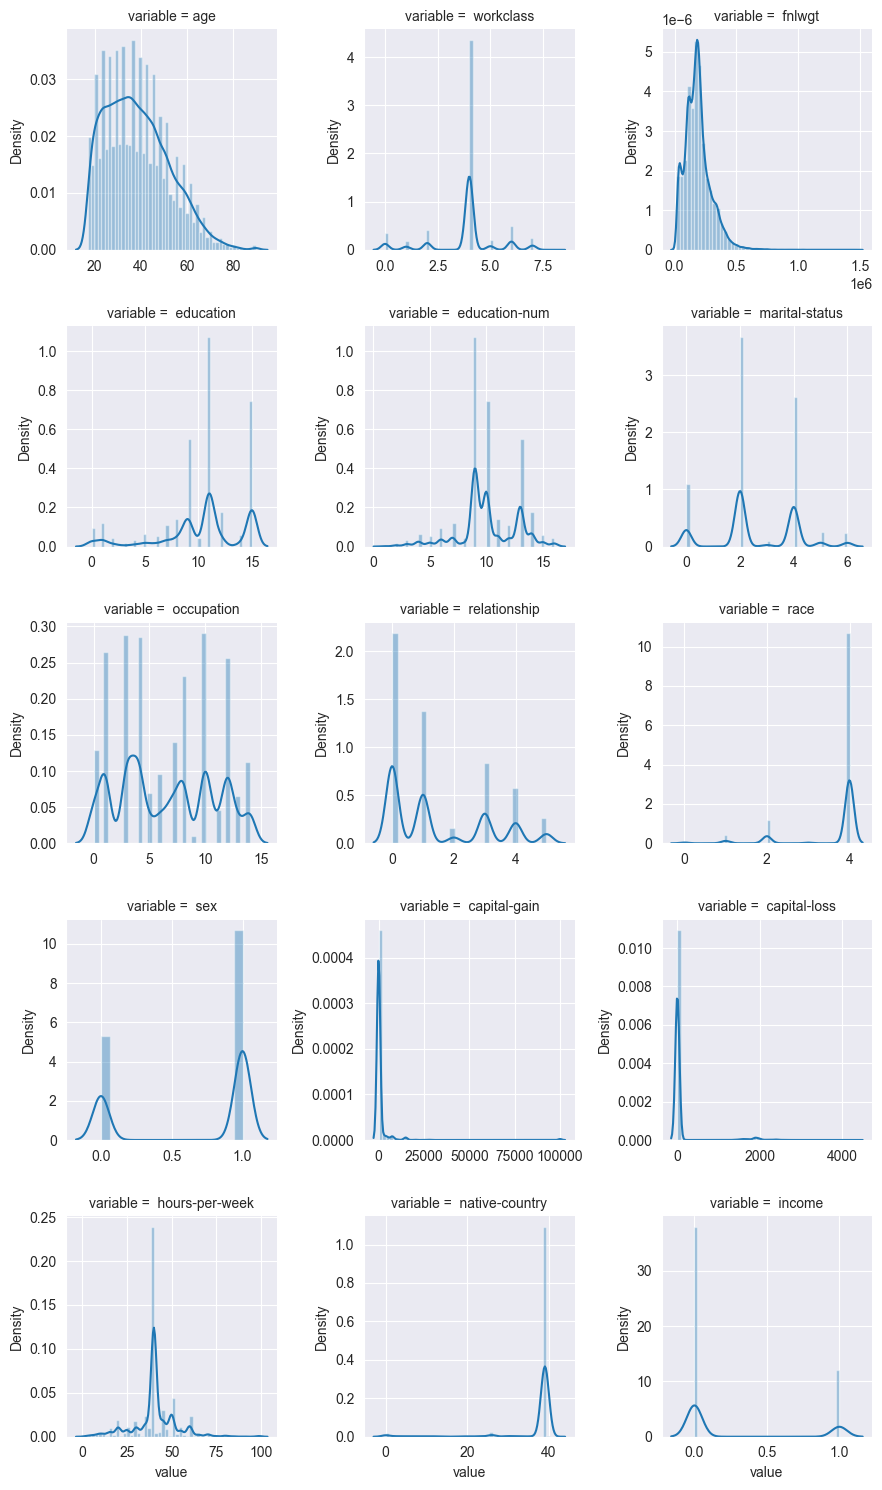

In [83]:
num = [f for f in df.columns if df.dtypes[f] != 'object']
nd = pd.melt(df, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=3, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

### Distplot Insights: -

Above is the distrution bar graphs to confirm about the statistics of the data about the skewness, the above results are:
1. 8 columns are positive skewed and 7 columns are negative skewed
2. 1 column is added here i.e income which is our target variable ~ which is also +ve skewed. In that case we'll need to log transform this variable so that it becomes normally distributed. A normally distributed (or close to normal) target variable helps in better modeling the relationship between target and independent variables

### Why Distplot?
Skewness is demonstrated on a bell curve when data points are not distributed symmetrically to the left and right sides of the median on a bell curve. If the bell curve is shifted to the left or the right, it is said to be skewed.

We can observe that the bell curve is shifted to left we indicates positive skewness.As all the column are positively skewed we don't need to do scaling.

Let's proceed and check the distribution of the target variable.


In [78]:
#+ve skewed 
df[' income'].skew()

1.212430242019683

#### The target variable is positively skewed.A normally distributed (or close to normal) target variable helps in better modeling the relationship between target and independent variables. 

# 3. Heatmap




A heatmap (or heat map) is a graphical representation of data where values are depicted by color.Heatmaps make it easy to visualize complex data and understand it at a glance 

__Correlation__ - A positive correlation is a relationship between two variables in which both variables move in the same direction. Therefore, when one variable increases as the other variable increases, or one variable decreases while the other decreases.

Correlation can have a value:

- 1 is a perfect positive correlation
- 0 is no correlation (the values don't seem linked at all)
- -1 is a perfect negative correlation



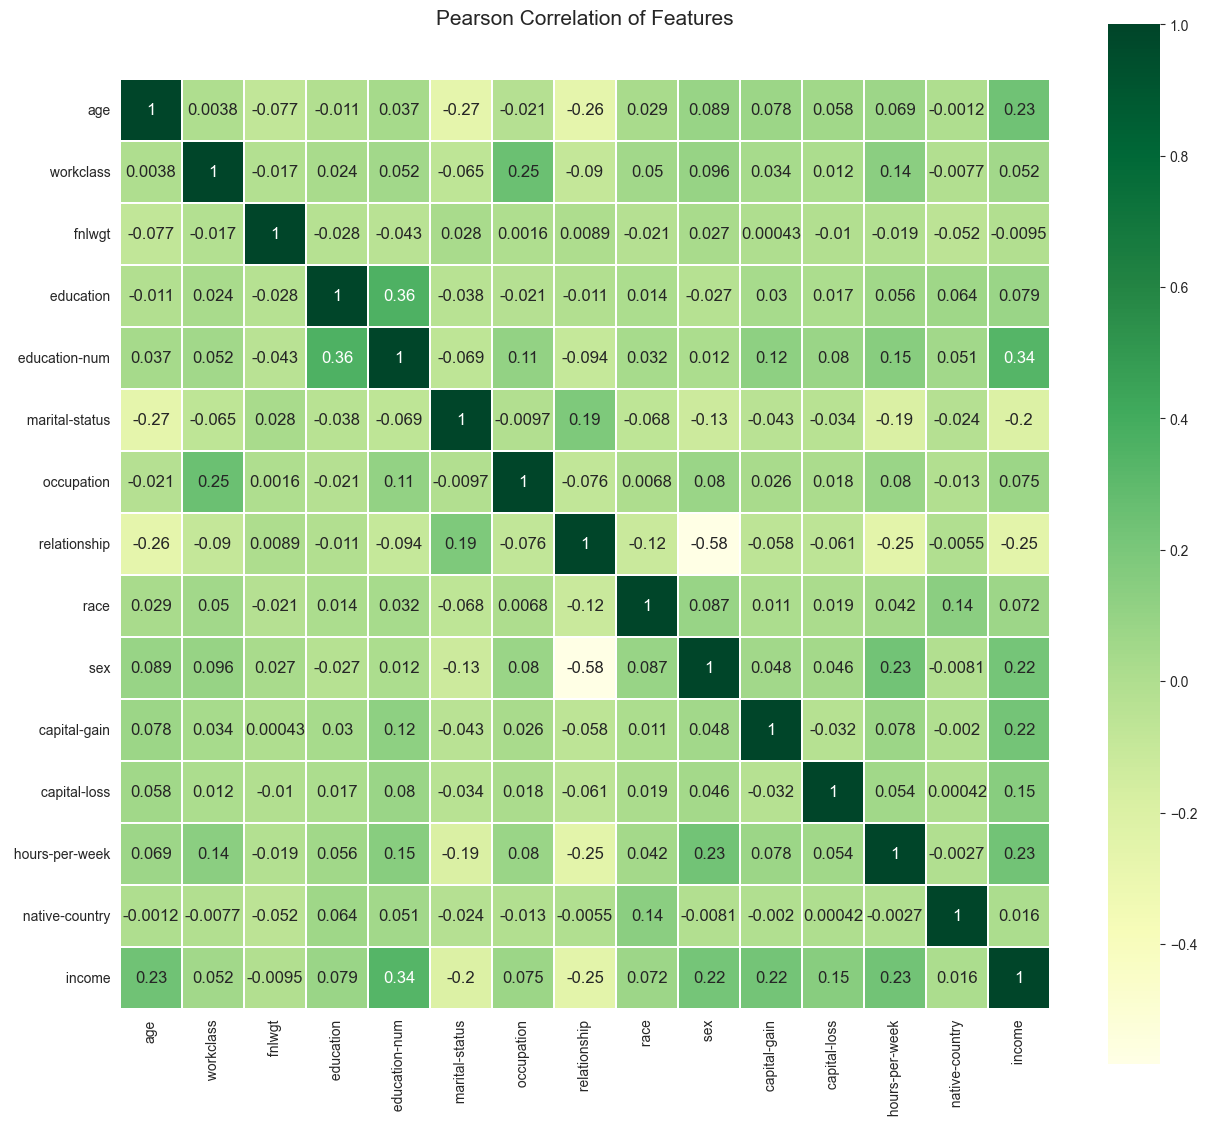

In [80]:
#correlation plot
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(15, 15))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = "YlGn",
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(df)


### Notice the last column from right side of this map. We can see the correlation of all variables against income. As you can see, some variables seem to be strongly correlated with the target variable. Here, a numeric correlation score will help us understand the graph better.

In [260]:
print (corr[' income'].sort_values(ascending=False)[:15], '\n') #top 15 values
print ('-------------------------------------')
print (corr[' income'].sort_values(ascending=False)[-5:]) #last 5 values
print ('-------------------------------------')

 income            1.000000
 education-num     0.335154
 relationship      0.250918
age                0.234037
 hours-per-week    0.229689
 capital-gain      0.223329
 sex               0.215980
 marital-status    0.199307
 capital-loss      0.150526
 education         0.079317
 occupation        0.075468
 race              0.071846
 workclass         0.051604
 native-country    0.015840
 fnlwgt            0.009463
Name:  income, dtype: float64 

-------------------------------------
 occupation        0.075468
 race              0.071846
 workclass         0.051604
 native-country    0.015840
 fnlwgt            0.009463
Name:  income, dtype: float64
-------------------------------------


Here we see that the education-num feature is 33% correlated with the target variable.

In [261]:
corr

age   workclass    fnlwgt   education   education-num  \
age              1.000000    0.003787  0.076646    0.010508        0.036527   
 workclass       0.003787    1.000000  0.016656    0.023513        0.052085   
 fnlwgt          0.076646    0.016656  1.000000    0.028145        0.043195   
 education       0.010508    0.023513  0.028145    1.000000        0.359153   
 education-num   0.036527    0.052085  0.043195    0.359153        1.000000   
 marital-status  0.266288    0.064731  0.028153    0.038407        0.069304   
 occupation      0.020947    0.254892  0.001597    0.021260        0.109697   
 relationship    0.263698    0.090461  0.008931    0.010876        0.094153   
 race            0.028718    0.049742  0.021291    0.014131        0.031838   
 sex             0.088832    0.095981  0.026858    0.027356        0.012280   
 capital-gain    0.077674    0.033835  0.000432    0.030046        0.122630   
 capital-loss    0.057775    0.012216  0.010252    0.016746        0.079923   
 hours-per-week  0.068756    0.138962  0.018768    0.055510        0.148123   
 native-country  0.001151    0.007690  0.051966    0.064288        0.050840   
 income          0.234037    0.051604  0.009463    0.079317        0.335154   

                  marital-status   occupation   relationship      race  \
age                     0.266288     0.020947       0.263698  0.028718   
 workclass              0.064731     0.254892       0.090461  0.049742   
 fnlwgt                 0.028153     0.001597       0.008931  0.021291   
 education              0.038407     0.021260       0.010876  0.014131   
 education-num          0.069304     0.109697       0.094153  0.031838   
 marital-status         1.000000     0.009654       0.185451  0.068013   
 occupation             0.009654     1.000000       0.075607  0.006763   
 relationship           0.185451     0.075607       1.000000  0.116055   
 race                   0.068013     0.006763       0.116055  1.000000   
 sex                    0.129314     0.080296       0.582454  0.087204   
 capital-gain           0.043393     0.025505       0.057919  0.011145   
 capital-loss           0.034187     0.017987       0.061062  0.018899   
 hours-per-week         0.190519     0.080383       0.248974  0.041910   
 native-country         0.023819     0.012543       0.005507  0.137852   
 income                 0.199307     0.075468       0.250918  0.071846   

                      sex   capital-gain   capital-loss   hours-per-week  \
age              0.088832       0.077674       0.057775         0.068756   
 workclass       0.095981       0.033835       0.012216         0.138962   
 fnlwgt          0.026858       0.000432       0.010252         0.018768   
 education       0.027356       0.030046       0.016746         0.055510   
 education-num   0.012280       0.122630       0.079923         0.148123   
 marital-status  0.129314       0.043393       0.034187         0.190519   
 occupation      0.080296       0.025505       0.017987         0.080383   
 relationship    0.582454       0.057919       0.061062         0.248974   
 race            0.087204       0.011145       0.018899         0.041910   
 sex             1.000000       0.048480       0.045567         0.229309   
 capital-gain    0.048480       1.000000       0.031615         0.078409   
 capital-loss    0.045567       0.031615       1.000000         0.054256   
 hours-per-week  0.229309       0.078409       0.054256         1.000000   
 native-country  0.008119       0.001982       0.000419         0.002671   
 income          0.215980       0.223329       0.150526         0.229689   

                  native-country    income  
age                     0.001151  0.234037  
 workclass              0.007690  0.051604  
 fnlwgt                 0.051966  0.009463  
 education              0.064288  0.079317  
 education-num          0.050840  0.335154  
 marital-status         0.023819  0.199307  
 occupation             0.012543  0.0754

### Heatmap insights: -

As we know, it is recommended to avoid correlated features in your dataset. Indeed, a group of highly correlated features will not bring additional information (or just very few), but will increase the complexity of the algorithm, hence increasing the risk of errors.




### Why Heatmap?

Heatmaps are used to show relationships between two variables, one plotted on each axis. By observing how cell colors change across each axis, you can observe if there are any patterns in value for one or both variables.

# 4. Boxplot

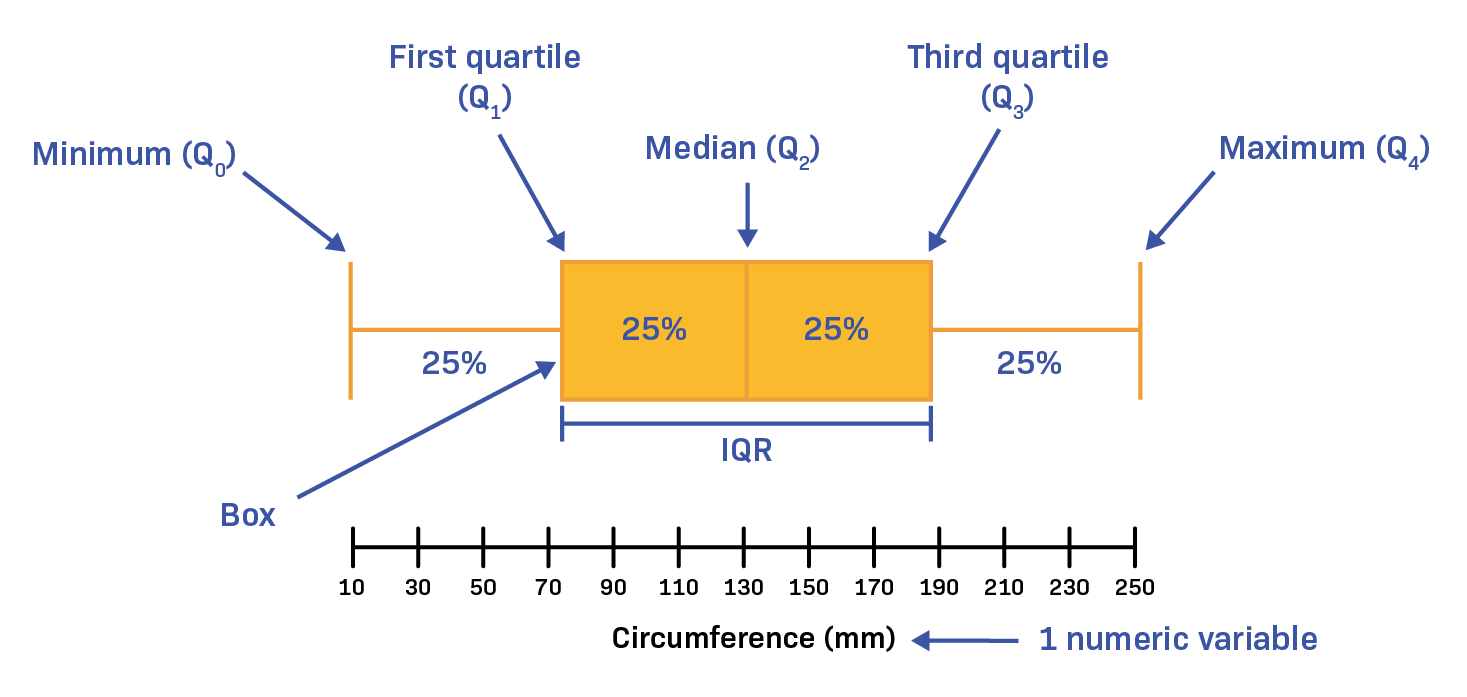

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile [Q1], median, third quartile [Q3] and “maximum”).

Basically, to find the outlier in a dataset/column.

In [262]:
features = df.columns.tolist()
features.remove(' income')

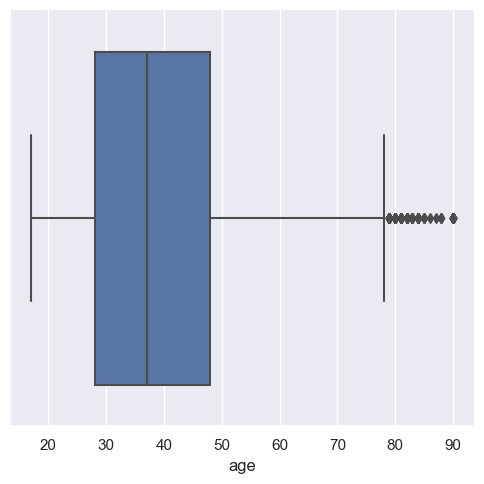

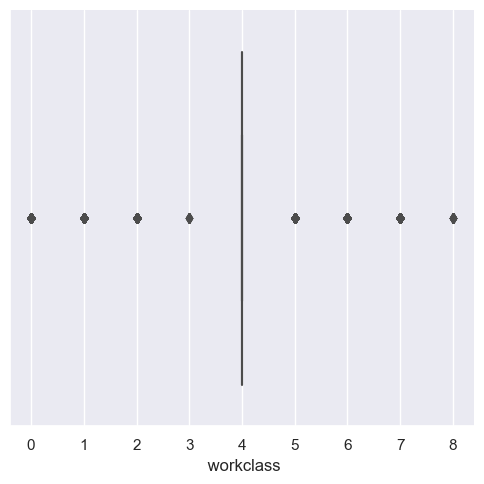

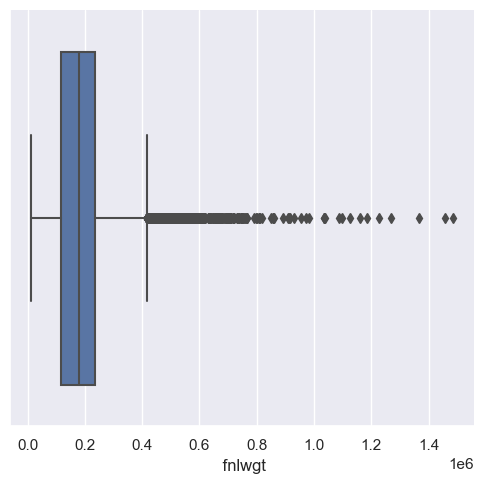

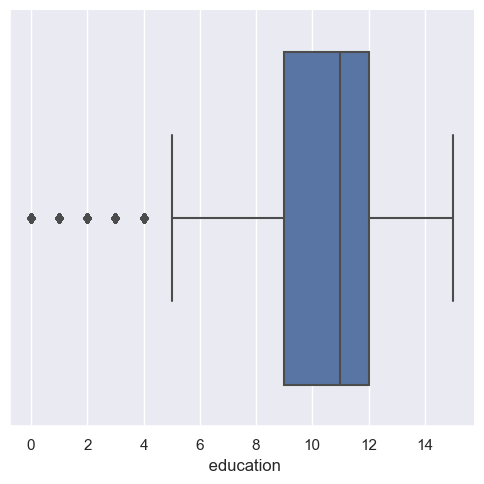

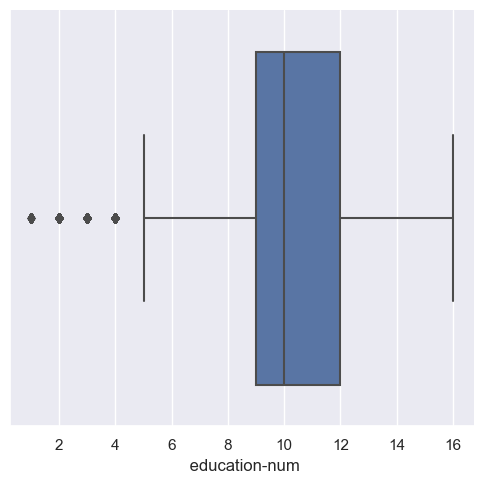

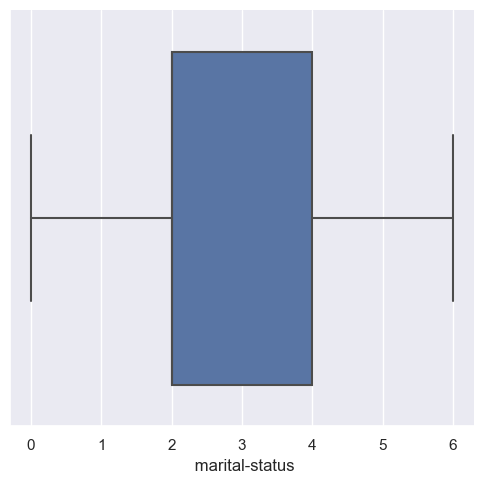

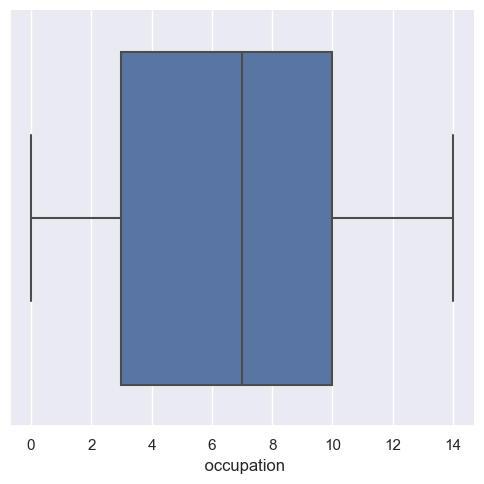

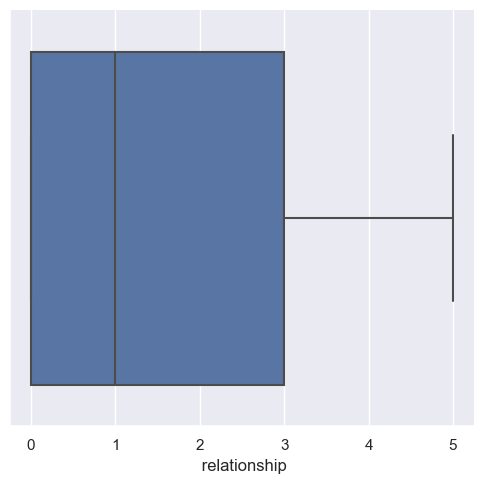

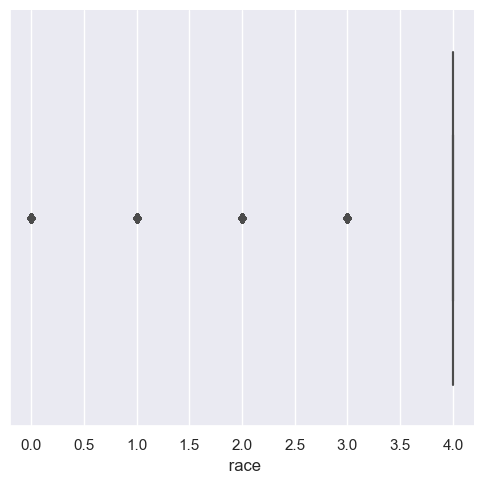

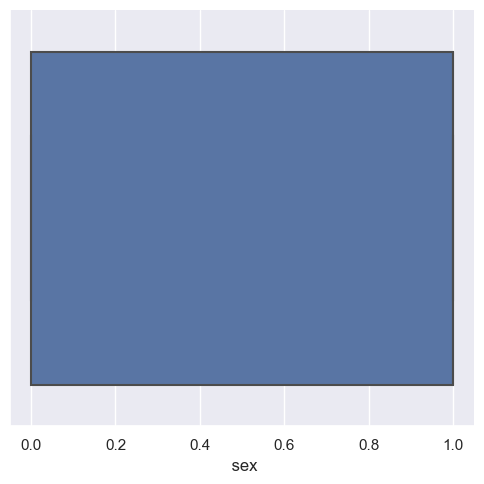

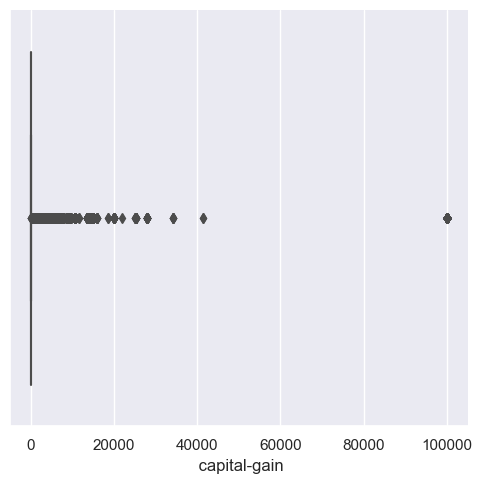

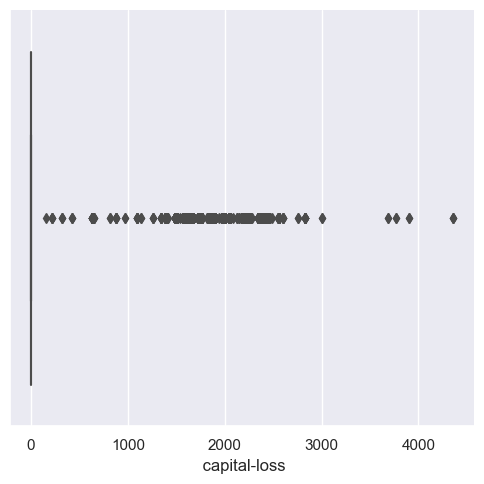

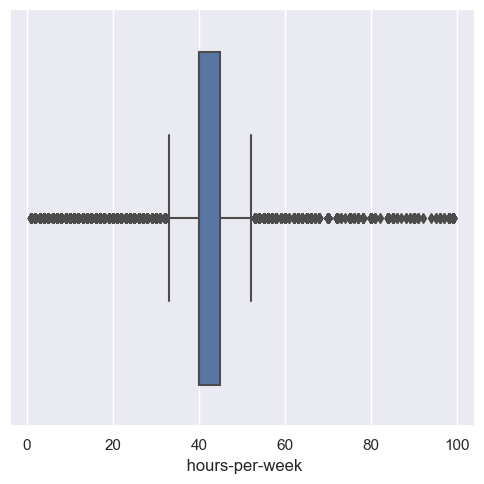

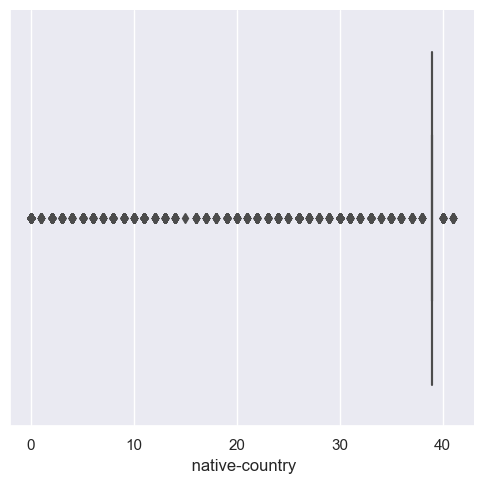

In [263]:
for value in features:
    sns.catplot(data=df, x=value,  kind="box")

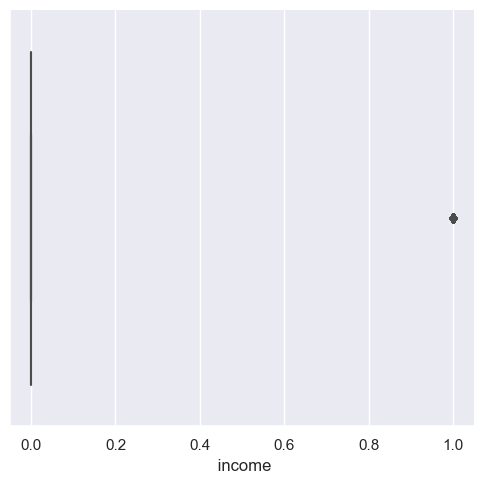

In [264]:
#for target variable
sns.catplot(data=df, x=' income', kind='box')

#### The dark points are known as Outliers. Outliers are those data points that are significantly different from the rest of the dataset. They are often abnormal observations that skew the data distribution, and arise due to inconsistent data entry, or erroneous observations.

### Boxplot Insights: - 
- Sometimes outliers may be an error in the data and should be removed. In this case these points are correct readings yet they are different from the other points that they appear to be incorrect.

- The best way to decide wether to remove them or not is to train models with and without these data points and compare their validation accuracy.

- So we will keep it unchanged as it won't affect our model.

Here, we can see that most of the variables possess outlier values. It would take us days if we start treating these outlier values one by one. Hence, for now we'll leave them as is and let our algorithm deal with them. As we know, tree-based algorithms are usually robust to outliers.

### Why Boxplot?
Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.



In the next step we will divide our cleaned data into training data and testing data.

# 5. Pair Plot

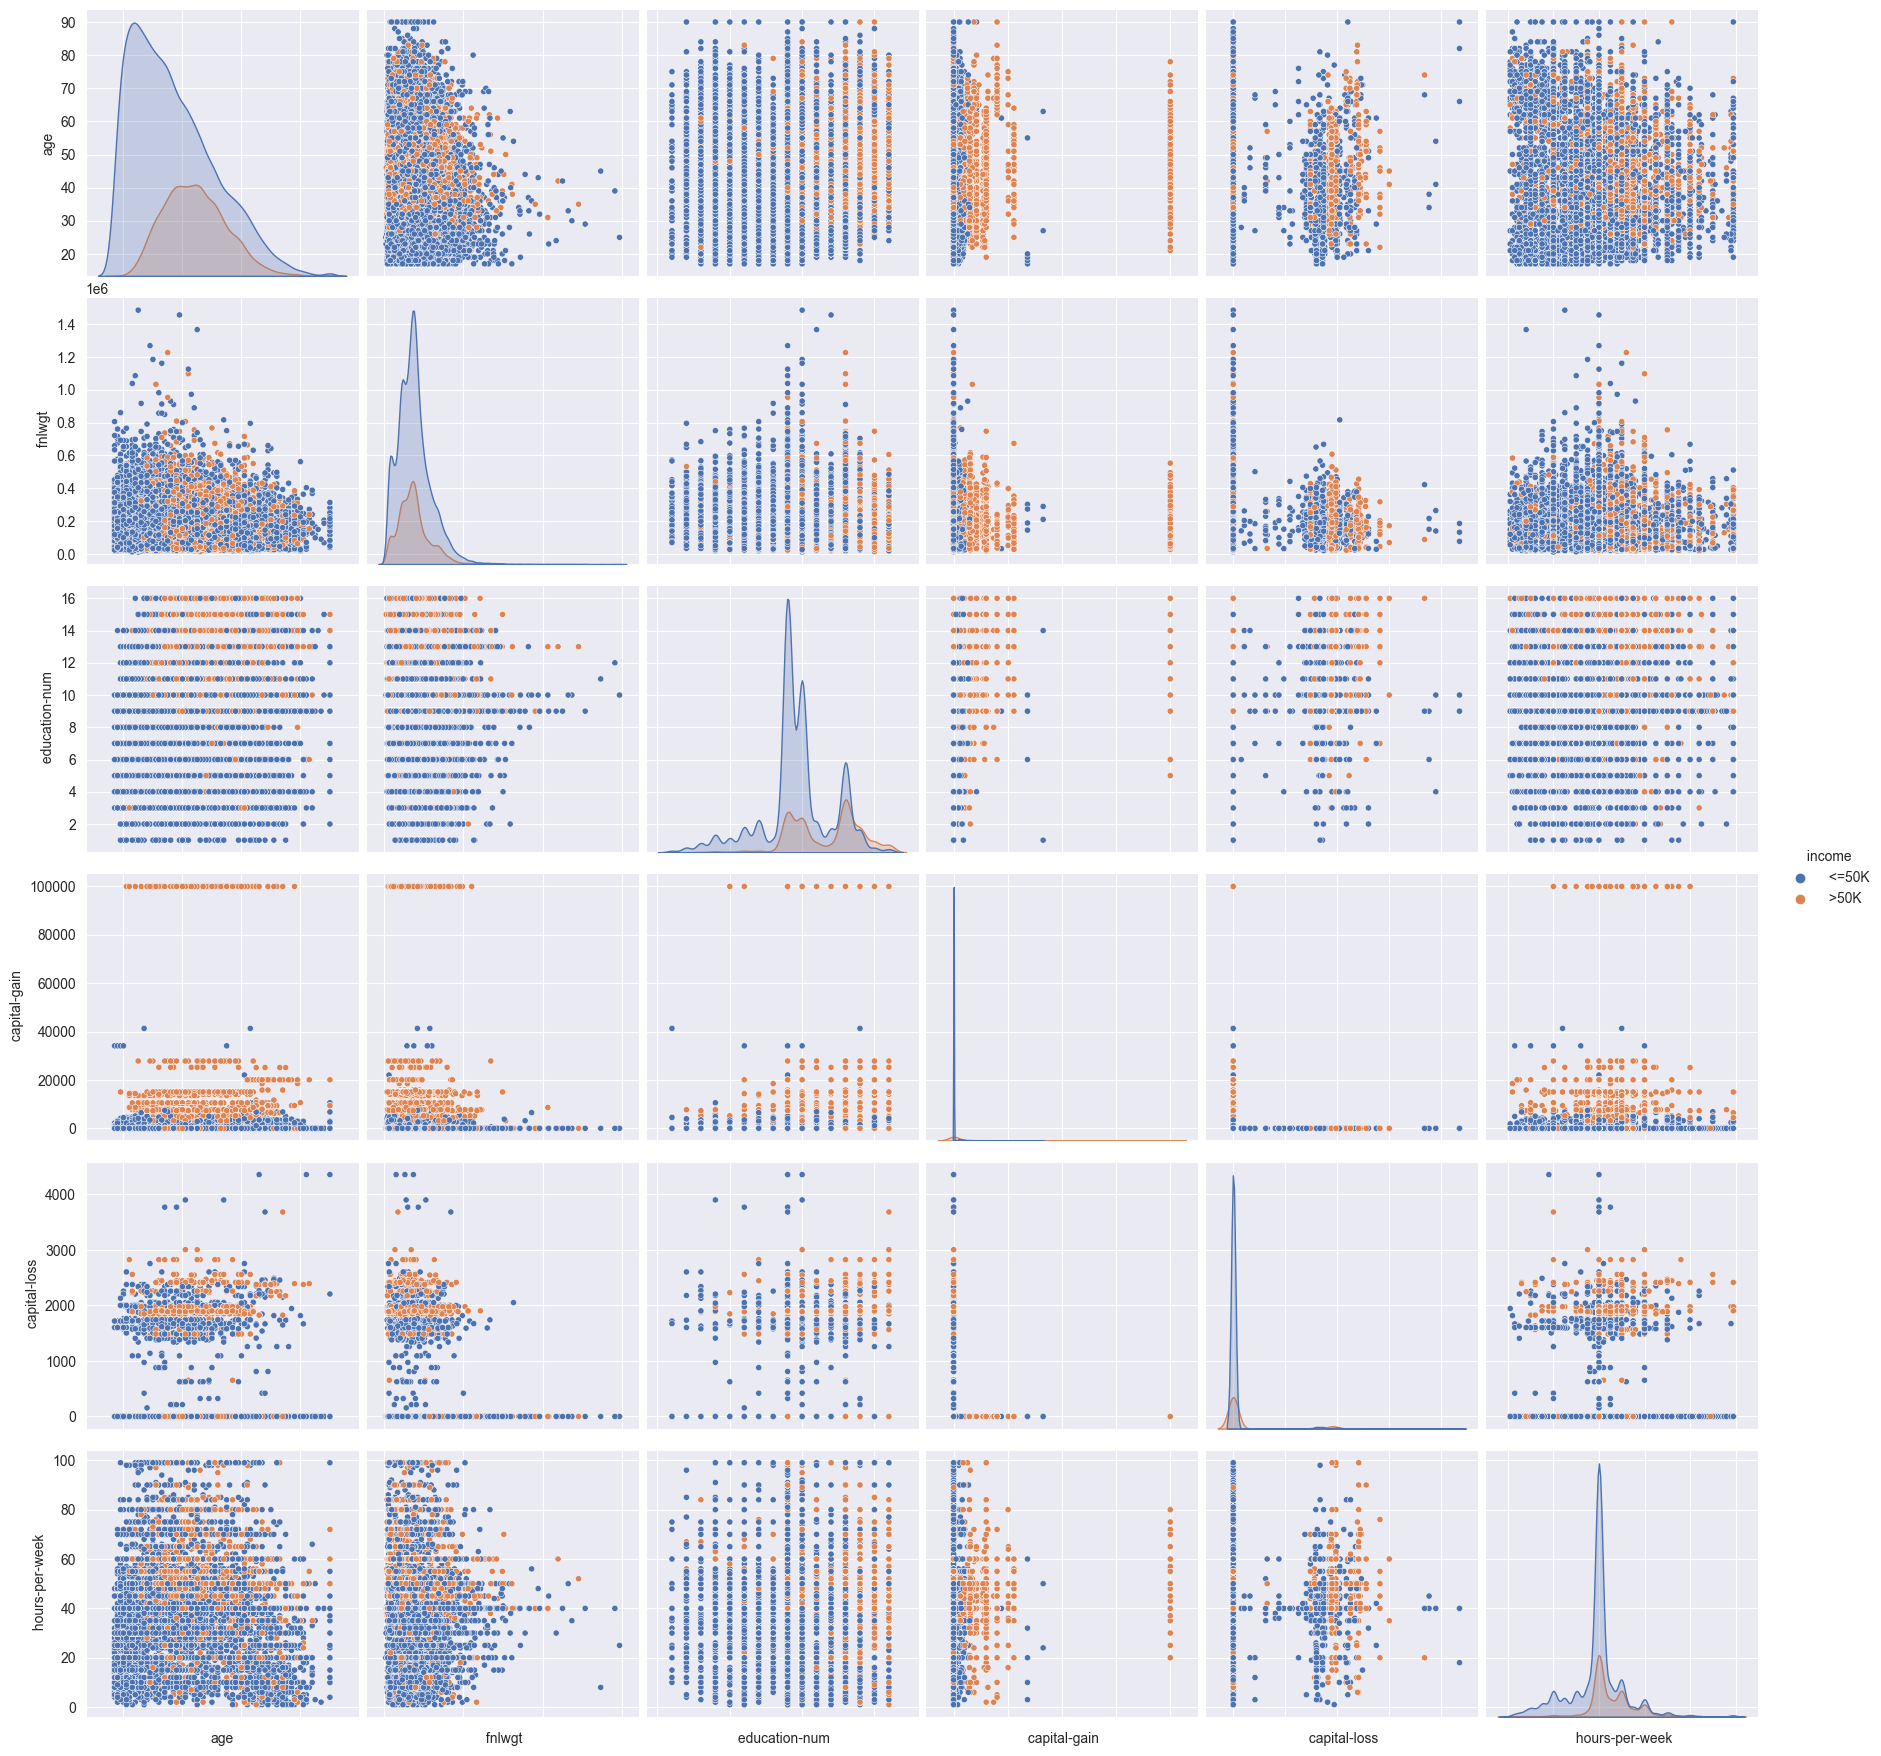

In [35]:
pp = sns.pairplot(df, hue = ' income', palette = 'deep', 
                  size=3, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=20) )
pp.set(xticklabels=[])

### What is pair plot?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

# Step 2: Data Preparation
**Goal:-**

Tasks we are going to in this step:

1. Now we will spearate the target variable and feature columns in two different dataframe and will check the shape of the dataset for validation purpose.
2. Split dataset into train and test dataset.
3. Scaling on train dataset.

**1. Now we spearate the target variable and feature columns in two different dataframe and will check the shape of the dataset for validation purpose.**

In [265]:
# Separate target and feature column in X and y variable

target = ' income'

# X will be the features
X = df.drop(target,axis=1) 
#y will be the target variable
y = df[target]

y have target variable and X have all other variable.

#### Here in income classification, income is the target variable.

In [266]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              32561 non-null  int64
 1    workclass       32561 non-null  int32
 2    fnlwgt          32561 non-null  int64
 3    education       32561 non-null  int32
 4    education-num   32561 non-null  int64
 5    marital-status  32561 non-null  int32
 6    occupation      32561 non-null  int32
 7    relationship    32561 non-null  int32
 8    race            32561 non-null  int32
 9    sex             32561 non-null  int32
 10   capital-gain    32561 non-null  int64
 11   capital-loss    32561 non-null  int64
 12   hours-per-week  32561 non-null  int64
 13   native-country  32561 non-null  int32
dtypes: int32(8), int64(6)
memory usage: 2.5 MB


In [267]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name:  income, Length: 32561, dtype: int32

In [268]:
# Check the shape of X and y variable
X.shape, y.shape

((32561, 14), (32561,))

In [269]:
# Reshape the y variable 
y = y.values.reshape(-1,1)

In [270]:
# Again check the shape of X and y variable
X.shape, y.shape

((32561, 14), (32561, 1))

#### 2. Spliting the dataset in training and testing data. 

*Here we are spliting our dataset into 80/20 percentage where 80% dataset goes into the training part and 20% goes into testing  part.*

In [271]:
# Split the X and y into X_train, X_test, y_train, y_test variables with 80-20% split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [272]:
# Check shape of the splitted variables
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26048, 14), (6513, 14), (26048, 1), (6513, 1))

### Insights: -

Train test split technique is used to estimate the performance of machine learning algorithms which are used to make predictions on data not used to train the model.It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms for your predictive modeling problem. Although simple to use and interpret, there are times when the procedure should not be used, such as when you have a small dataset and situations where additional configuration is required, such as when it is used for classification and the dataset is not balanced.

In the next step we will train our model on the basis of our training and testing data.

# Step 3: Model Training

#### Goal:
In this step we are going to train our dataset on different classification algorithms. As we know that our target variable is in discrete format so we have to apply classification algorithm. Target variable is a category like filtering.In our dataset we have the outcome variable or Dependent variable i.e Y having only two set of values, either M (Malign) or B(Benign). So we will use Classification algorithm**

__Algorithms we are going to use in this step__

1. Logistic Regression
2. KNearest Neighbor
3. Random Forest Classification

K-fold cross validation is a procedure used to estimate the skill of the model on new data. There are common tactics that you can use to select the value of k for your dataset. There are commonly used variations on cross-validation, such as stratified and repeated, that are available in scikit-learn

In [273]:
# Define kfold with 10 split
cv = KFold(n_splits=10, shuffle=True, random_state=42)

The goal of cross-validation is to test the model's ability to predict new data that was not used in estimating it, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset, for instance from a real problem).

# 1. Logistic Regression

Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables.

Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.

#### Train set cross-validation 

In [274]:
#Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression

log_R = LogisticRegression() #Object Creation

log_R.fit(X_train, y_train)

LogisticRegression()

In [275]:
#Accuracy check of trainig data

#Get R2 score
log_R.score(X_train, y_train)


0.7872773341523341

In [276]:
#Accuracy of test data
log_R.score(X_test, y_test) 

0.7894979272224781

In [277]:
# Getting kfold values
lg_scores = -1 * cross_val_score(log_R, 
                                 X_train, 
                                 y_train, 
                                 cv=cv, 
                                 scoring='neg_root_mean_squared_error')
lg_scores

array([0.46406367, 0.45445122, 0.45907359, 0.44849931, 0.4594915 ,
       0.46115935, 0.45148507, 0.45275866, 0.47519096, 0.46332466])

In [278]:
# Mean of the train kfold scores
lg_score_train = np.mean(lg_scores)
lg_score_train

0.4589497989369775

### Prediction 

Now we will perform prediction on the dataset using Logistic Regression.

In [279]:
# Predict the values on X_test_scaled dataset 
y_predicted = log_R.predict(X_test)

## Various parameters are calculated for analysing the predictions.

1) Confusion Matrix
2)Classification Report
3)Accuracy Score
4)Precision Score
5)Recall Score
6)F1 Score

## Confusion Matrix

A confusion matrix presents a table layout of the different outcomes of the prediction and results of a classification problem and helps visualize its outcomes. It plots a table of all the predicted and actual values of a classifier.

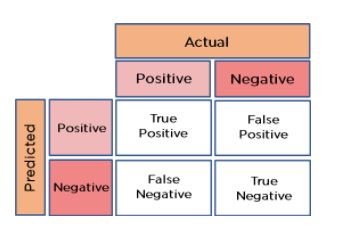

#### This diagram helps in understanding the concept of confusion matrix. 

In [280]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix

In [281]:
#confusion matrix btw y_test and y_predicted
cm = confusion_matrix(y_test,y_predicted)

Text(29.75, 0.5, 'True Class')

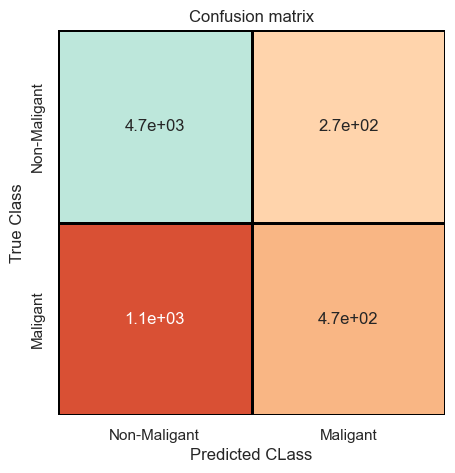

In [282]:
#We are creating Confusion Matrix on heatmap to have better understanding 
# sns.heatmap(cm,cmap = 'Red') ~ to check for available colors
sns.set(rc = {'figure.figsize':(5,5)})
sns.heatmap(cm,cmap = 'icefire_r', annot = True, cbar=False, linecolor='Black', linewidth = 2)

plt.title("Confusion matrix")
plt.xticks(np.arange(2)+.5,['Non-Maligant', 'Maligant'])
plt.yticks(np.arange(2)+.5,['Non-Maligant', 'Maligant'])
plt.xlabel('Predicted CLass')
plt.ylabel('True Class')


<AxesSubplot:>

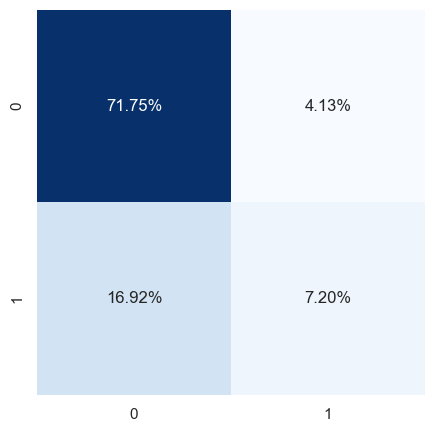

In [283]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues', cbar = False)

## Evaluating all kinds of evaluating parameters. 

#### Classification Report :
A classification report is a performance evaluation metric in machine learning. It is used to show the precision, recall, F1 Score, and support of your trained classification model. 

#### F1_score :
The F1 score is a machine learning metric that can be used in classification models. 

#### Precision_score :
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative. The best value is 1 and the worst value is 0.

#### Recall_score :
Recall score is used to measure the model performance in terms of measuring the count of true positives in a correct manner out of all the actual positive values. Precision-Recall score is a useful measure of success of prediction when the classes are very imbalanced.

In [284]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score
from sklearn.metrics import confusion_matrix
  

print("The model used is Logistic Regression")
  
l_acc = accuracy_score(y_test, y_predicted)*100
print("\nThe accuracy is: {}".format(l_acc))
  
prec = precision_score(y_test, y_predicted)
print("The precision is: {}".format(prec))
  
rec = recall_score(y_test, y_predicted)
print("The recall is: {}".format(rec))
  
f1 = f1_score(y_test, y_predicted)
print("The F1-Score is: {}".format(f1))
  
c1 = classification_report(y_test, y_predicted)
print("Classification Report is:")
print()
print(c1)

The model used is Logistic Regression

The accuracy is: 78.9497927222478
The precision is: 0.6355013550135501
The recall is: 0.2985359643539147
The F1-Score is: 0.40623646600259855
Classification Report is:

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      4942
           1       0.64      0.30      0.41      1571

    accuracy                           0.79      6513
   macro avg       0.72      0.62      0.64      6513
weighted avg       0.77      0.79      0.76      6513



# 2. K Nearest Neighbour

K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.
K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.
K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm

In [285]:
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [286]:
#Accuracy check of trainig data
#Get R2 score
classifier.score(X_train, y_train)

0.8333077395577395

In [287]:
#Accuracy of test data
classifier.score(X_test, y_test) 

0.7785966528481498

In [288]:
#Get kfold values
Nn_scores = -1 * cross_val_score(classifier, 
                                    X_train, 
                                    y_train, 
                                    cv=cv, 
                                    scoring='neg_root_mean_squared_error')
Nn_scores


array([0.45739813, 0.47266955, 0.48191875, 0.47671299, 0.48706887,
       0.47509975, 0.4702268 , 0.46940972, 0.48558325, 0.4719473 ])

In [289]:
# Mean of the train kfold scores
Nn_score_train = np.mean(Nn_scores)
Nn_score_train

0.4748035120765627

### Prediction

Now we will perform prediction on the dataset using K Nearest Neighbour.

In [290]:
# Predict the values on X_test_scaled dataset 
y_predicted = classifier.predict(X_test)

In [291]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix

In [292]:
#Confusion matrix btw y_test and y_predicted
cm = confusion_matrix(y_test,y_predicted)

Text(29.75, 0.5, 'True Class')

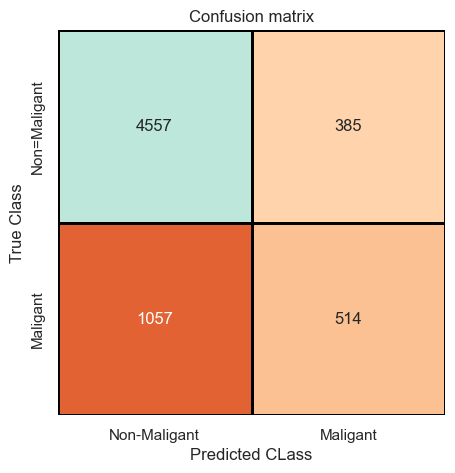

In [293]:
#We are drawing cm on heatmap to have better understanding 
# sns.heatmap(cm,cmap = 'Red') ~ to check for available colors
sns.heatmap(cm,cmap = 'icefire_r', annot = True, fmt= 'd', cbar=False, linecolor='Black', linewidth = 2)
plt.title("Confusion matrix")
plt.xticks(np.arange(2)+.5,['Non-Maligant', 'Maligant'])
plt.yticks(np.arange(2)+.5,['Non=Maligant', 'Maligant'])
plt.xlabel('Predicted CLass')
plt.ylabel('True Class')

<AxesSubplot:>

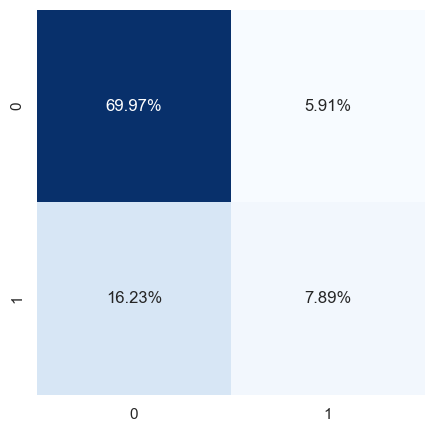

In [294]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues', cbar = False)

### Evaluating all kinds of evaluating parameters. 

In [295]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score
from sklearn.metrics import confusion_matrix
  

print("The model used is KNeighbors Classifier")
  
k_acc = accuracy_score(y_test, y_predicted)*100
print("\nThe accuracy is: {}".format(k_acc))
  
prec = precision_score(y_test, y_predicted)
print("The precision is: {}".format(prec))
  
rec = recall_score(y_test, y_predicted)
print("The recall is: {}".format(rec))
  
f1 = f1_score(y_test, y_predicted)
print("The F1-Score is: {}".format(f1))
  
c1 = classification_report(y_test, y_predicted)
print("Classification Report is:")
print()
print(c1)    

The model used is KNeighbors Classifier

The accuracy is: 77.85966528481498
The precision is: 0.5717463848720801
The recall is: 0.32718014003819224
The F1-Score is: 0.4161943319838057
Classification Report is:

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      4942
           1       0.57      0.33      0.42      1571

    accuracy                           0.78      6513
   macro avg       0.69      0.62      0.64      6513
weighted avg       0.75      0.78      0.76      6513



# 3. Random Forest Classifier

Random Forest is a powerful and versatile supervised machine learning algorithm that grows and combines multiple decision trees to create a “forest.” It can be used for both classification and regression problems in R and Python.

Random Forest and Decision Tree Algorithm are considered best for the data that has outliers.

In [296]:
#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm

from sklearn.ensemble import RandomForestClassifier
#clas = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
clas = RandomForestClassifier()
clas.fit(X_train, y_train)


RandomForestClassifier()

In [297]:
#Accuracy check of trainig data
#Get R2 score
clas.score(X_train, y_train)

0.9999616093366094

In [298]:
#Accuracy of test data
clas.score(X_test, y_test) 

0.8628896054045755

In [299]:
# Get kfold values
Dta_scores = -1 * cross_val_score(clas, 
                                    X_train, 
                                    y_train, 
                                    cv=cv, 
                                    scoring='neg_root_mean_squared_error')
Dta_scores


array([0.36915632, 0.38443817, 0.36811498, 0.37738366, 0.39136554,
       0.35967569, 0.39234518, 0.37329266, 0.39873071, 0.37490398])

In [300]:
# Mean of the train kfold scores
Dta_score_train = np.mean(Dta_scores)
Dta_score_train

0.37894068886432536

### Prediction 

Now we will perform prediction on the dataset using Random Forest Classifier.

In [301]:
# predict the values on X_test_scaled dataset 
y_predicted = clas.predict(X_test)

In [302]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix

In [303]:
#confusion matrix btw y_test and y_predicted
cm = confusion_matrix(y_test,y_predicted)

Text(29.75, 0.5, 'True Class')

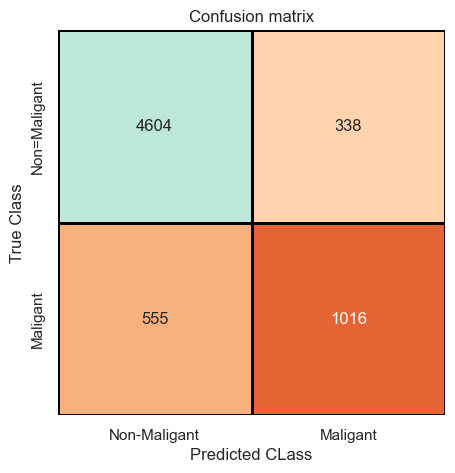

In [304]:
#We are drawing cm on heatmap to have better understanding 
# sns.heatmap(cm,cmap = 'Red') ~ to check for available colors
sns.heatmap(cm,cmap = 'icefire_r', annot = True, fmt= 'd', cbar=False, linecolor='Black', linewidth = 2)
plt.title("Confusion matrix")
plt.xticks(np.arange(2)+.5,['Non-Maligant', 'Maligant'])
plt.yticks(np.arange(2)+.5,['Non=Maligant', 'Maligant'])
plt.xlabel('Predicted CLass')
plt.ylabel('True Class')

<AxesSubplot:>

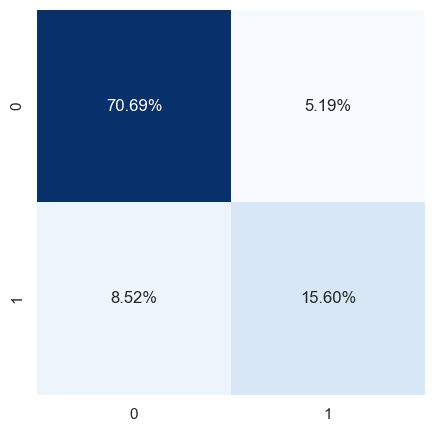

In [305]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues', cbar = False)

### Evaluating all kinds of evaluating parameters. 

In [306]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score
from sklearn.metrics import confusion_matrix
  

print("The model used is Random Forest Classifier")
  
r_acc = accuracy_score(y_test, y_predicted)*100
print("\nThe accuracy is {}".format(r_acc))
  
prec = precision_score(y_test, y_predicted)
print("The precision is {}".format(prec))
  
rec = recall_score(y_test, y_predicted)
print("The recall is {}".format(rec))
  
f1 = f1_score(y_test, y_predicted)
print("The F1-Score is {}".format(f1))
 
c1 = classification_report(y_test, y_predicted)
print("Classification Report is:")
print()
print(c1)  

The model used is Random Forest Classifier

The accuracy is 86.28896054045755
The precision is 0.7503692762186115
The recall is 0.6467218332272437
The F1-Score is 0.6947008547008547
Classification Report is:

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4942
           1       0.75      0.65      0.69      1571

    accuracy                           0.86      6513
   macro avg       0.82      0.79      0.80      6513
weighted avg       0.86      0.86      0.86      6513



# Insight: -

In [307]:
cal_metric=pd.DataFrame([l_acc,k_acc,r_acc],columns=["Score in percentage"])
cal_metric.index=['Logistic Regression',
                  'K-nearest Neighbours',
                  'Random Forest']
cal_metric

Score in percentage
Logistic Regression             78.949793
K-nearest Neighbours            77.859665
Random Forest                   86.288961


- As you can see with our Random Forest	(0.8621 or 86.21%)
- So we gonna save our model with Random Forest	 Algorithm

# Step 4: Save Model
**Goal:- In this step we are going to save our model in pickel format file.**

In [308]:
import pickle
pickle.dump(clas , open('Income_classification_lo.pkl', 'wb'))
pickle.dump(clas , open('Income_classification_kn.pkl', 'wb'))
pickle.dump(clas , open('Income_classification_ra.pkl', 'wb'))

In [309]:
import pickle

def model_prediction(features):
    
    pickled_model = pickle.load(open('Income_classification_ra.pkl', 'rb'))
    ic = str(pickled_model.predict(features)[0])
    if ic=='1':
        ic='greater then 50000'
    else:
        ic='less then or equal to 50000'
    
    return str(f'The income is {ic}')

#### We can test our model by giving our own parameters or features to predict. 

In [310]:
age = 27
workclass = 4
fnlwgt = 160178
education = 15
education_num = 10
marital_status = 0
occupation = 1
relationship = 1
race = 4
sex = 0
capital_gain = 0
capital_loss = 0
hours_per_week = 38
native_country = 39

In [311]:
model_prediction([[age, workclass, fnlwgt, education, education_num, marital_status, occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country]])

'The income is less then or equal to 50000'

1 = >50K, 0 = <=50K

# Step 5: After making model and checking its accuracy, we are going to deploy it in API/ Web App. 

This step holds a great importance as in this step we make a Web API which integrates our model and let it interacts with user.
The user simply put data he is asked to fill and our API will help in predicting.

### There are many methods to create Web Application like Flask, Streamlit, etc. We going to use streamlit to create API. Below is an API refrence. 

https://tinyurl.com/bdexnk6v

# Conclusion

After observing the problem statement we have build an efficient model to solve the problem. The above model helps in classify the person income. The accuracy for the prediction is 86.21%.